# Economics

## Notebook Links:
[Home](index.ipynb)

[Resale Market](resales.ipynb)

[Construction/Starts](starts.ipynb)

[Rental Market](rental.ipynb)

[Economic Drivers](economics.ipynb)

[Demograhics/Migration](demographics.ipynb)

## HTML Links:
[Home](index.html)

[Resale Market](resales.html)

[Construction/Starts](starts.html)

[Rental Market](rental.html)

[Economic Drivers](economics.html)

[Demograhics/Migration](demographics.html)

In [2]:
from stats_can import StatsCan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#seaborn theme
import seaborn as sns
sns.set(font='Arial')

C:\Users\Maln\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.7) or chardet (4.0.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
sc = StatsCan()
sc.update_tables()
df = sc.table_to_df('14-10-0378-01')


# GDP 

In [71]:
gdp = sc.table_to_df('36-10-0402-02')

In [72]:
ab_gdp=gdp[gdp['GEO']=='Alberta']

In [73]:
ab_gdp=ab_gdp[ab_gdp['UOM']=='Dollars']
ab_gdp=ab_gdp[ab_gdp['UOM']=='Dollars'][['REF_DATE','North American Industry Classification System (NAICS)','VALUE']]


In [74]:
ab_gdp=ab_gdp.rename({'REF_DATE':'Date'},axis=1)


In [75]:
ab_gdp=ab_gdp.drop_duplicates()

In [76]:
ab_gdp = ab_gdp[ab_gdp['North American Industry Classification System (NAICS)'].isin(['All industries [T001]','Energy sector [T016]','Information and communication technology sector [T013]'])]

In [77]:
gdp_pivot=ab_gdp.pivot_table(index='Date',columns='North American Industry Classification System (NAICS)',values='VALUE')

<AxesSubplot:xlabel='Date'>

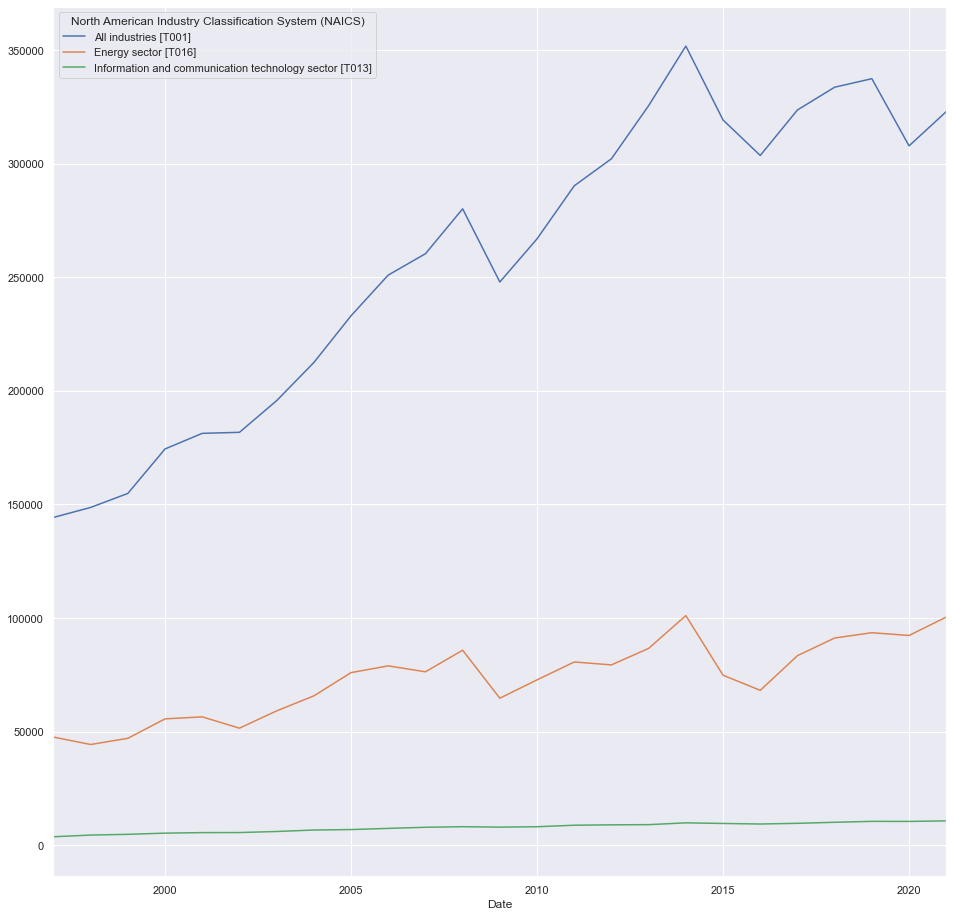

In [78]:
gdp_pivot.plot(figsize=(16,16))

In [80]:
gdp_pivot['Energy sector %'] = gdp_pivot['Energy sector [T016]']/gdp_pivot['All industries [T001]']
gdp_pivot['IT sector %'] = gdp_pivot['Information and communication technology sector [T013]']/gdp_pivot['All industries [T001]']

c:\Users\Maln\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


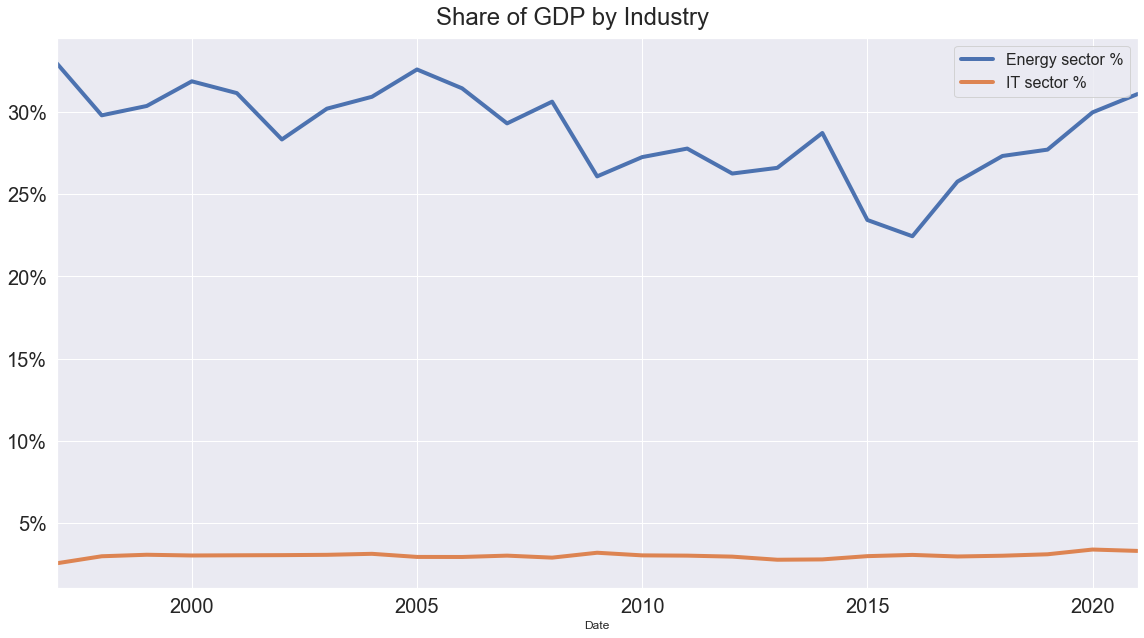

In [106]:
fig, ax = plt.subplots(figsize=(16,9))
fig.suptitle('Share of GDP by Industry', fontsize=24)

gdp_pivot[['Energy sector %', 'IT sector %']].plot(ax=ax, linewidth = 4)
plt.rc('xtick', labelsize=20)       # Controls x Tick Labels
plt.rc('ytick', labelsize=20) 
for axs in fig.axes:

   current_values = axs.get_yticks()
   axs.set_yticklabels(['{:,.0%}'.format(x) for x in current_values])
   axs.legend(fontsize='16')
plt.tight_layout()
plt.savefig('kbase_graphs/bild_gdp.png')

## Labour Market
Source: Statistics Canada, 14-10-0378-01

In [93]:
calgary = df[df['GEO']=="Calgary, Alberta"]
calgary = calgary[calgary['Sex']=='Both sexes']
calgary = calgary.filter(items = ['REF_DATE','Labour force characteristics','Age group','UOM', 'VALUE'])
calgary.rename(columns={'REF_DATE':'Date'},inplace=True)
cal_unadj = calgary[(calgary['UOM']=='Persons') ]
cal_tot = cal_unadj[cal_unadj['Age group']=='15 years and over']
cal_pivot = cal_tot.pivot(index='Date', columns = ['Labour force characteristics'],values ='VALUE')


In [94]:
cal_pivot.columns=cal_pivot.columns.tolist()
cal_pivot['Participation Rate']=(cal_pivot['Labour force']/cal_pivot['Population'])*100
cal_pivot['Unemployment Rate']=(cal_pivot['Unemployment']/cal_pivot['Labour force'])*100
cal_pivot['Employment Rate']=(cal_pivot['Employment']/cal_pivot['Labour force'])*100

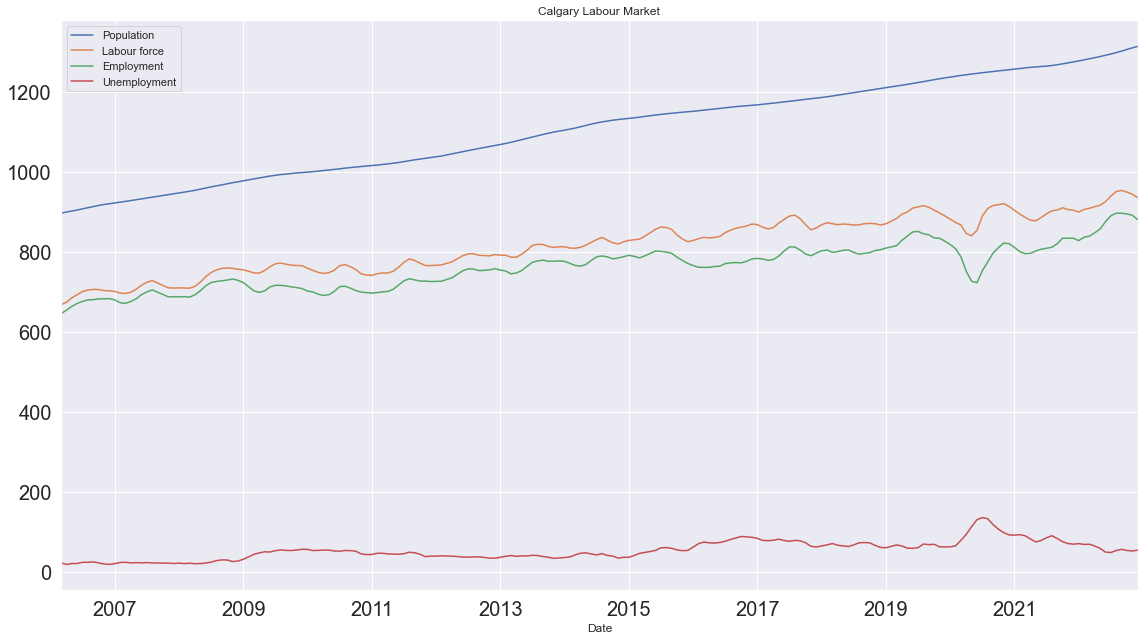

In [95]:
cal_pivot[['Population','Labour force', 'Employment','Unemployment']].plot(figsize = (16,9),kind='line', title = 'Calgary Labour Market')

plt.tight_layout()
plt.savefig('kbase_graphs/labour_mkt.png')

While population and labour force has been steadily growing in Calgary for the past 2 decades, unemployment has also increased, and stayed high since 2015. On the other hand, employment numbers have not caught up - mainly due to the impact of the local energy sector. 

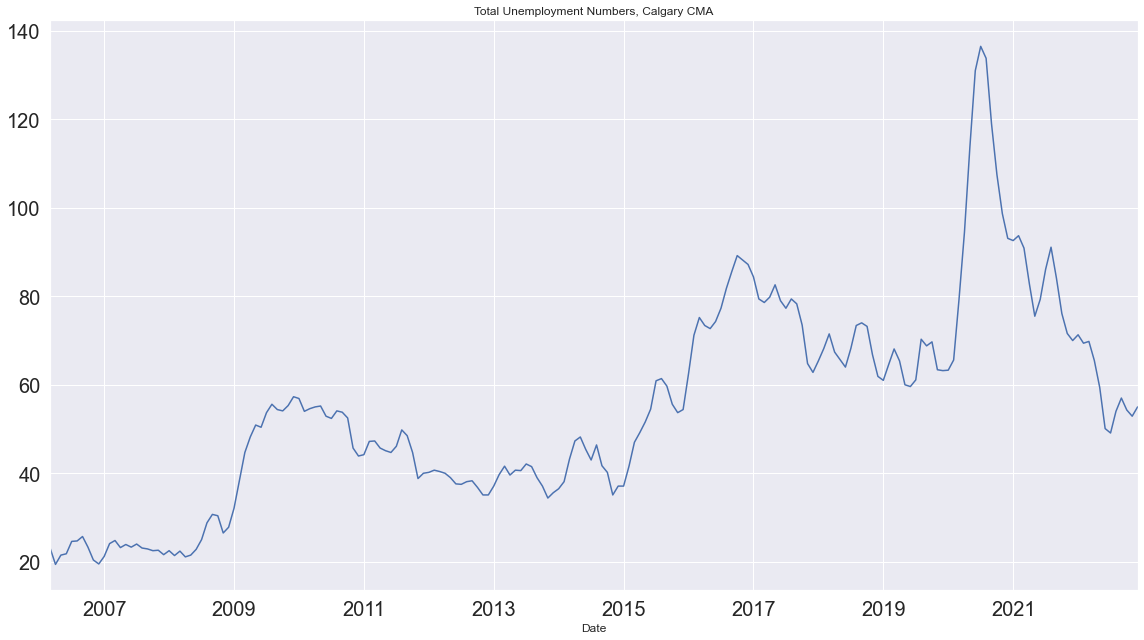

In [96]:
cal_pivot['Unemployment'].plot(figsize = (16,9),kind='line', title = 'Total Unemployment Numbers, Calgary CMA')
plt.tight_layout()
plt.savefig('kbase_graphs/unemploy.png')

A closer look on unemployment rates show that the spike of total unemployment due to the pandemic has mostly recovered, and is back to pre-COVID levels. However, unemployment is still significantly higher than pre-Oil bust levels in 2014. 

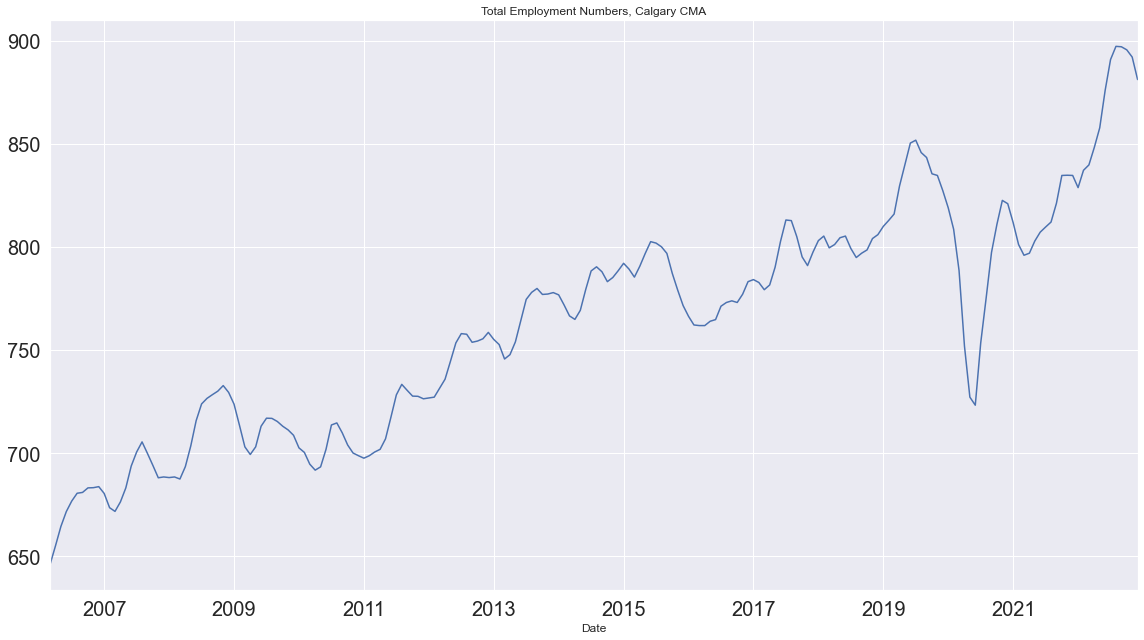

In [97]:
cal_pivot['Employment'].plot(figsize = (16,9),kind='line', title = 'Total Employment Numbers, Calgary CMA')
plt.tight_layout()
plt.savefig('kbase_graphs/employ.png')

Similarly, employment numbers are almost at previous all time highs in 2019, and is on an upward trend - from growth in labour force and population.

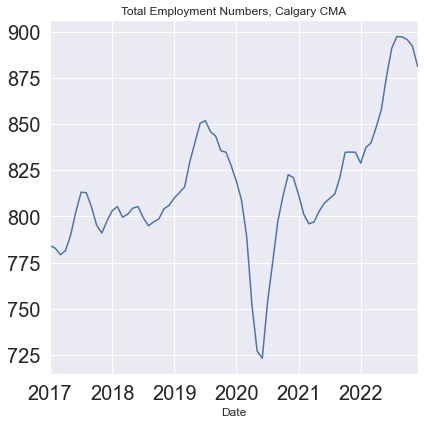

In [98]:
cal_pivot['Employment']['2017':].plot(figsize = (6,6),kind='line', title = 'Total Employment Numbers, Calgary CMA')
plt.tight_layout()

plt.savefig('kbase_graphs/cal_employ_short.png')

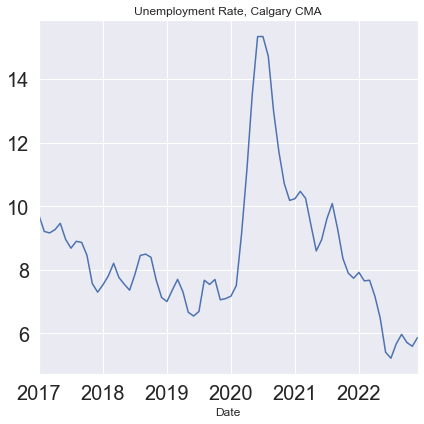

In [99]:
cal_pivot['Unemployment Rate']['2017':].plot(figsize = (6,6),kind='line', title = 'Unemployment Rate, Calgary CMA')
plt.tight_layout()

plt.savefig('kbase_graphs/cal_unemploy_short.png')

c:\Users\Maln\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


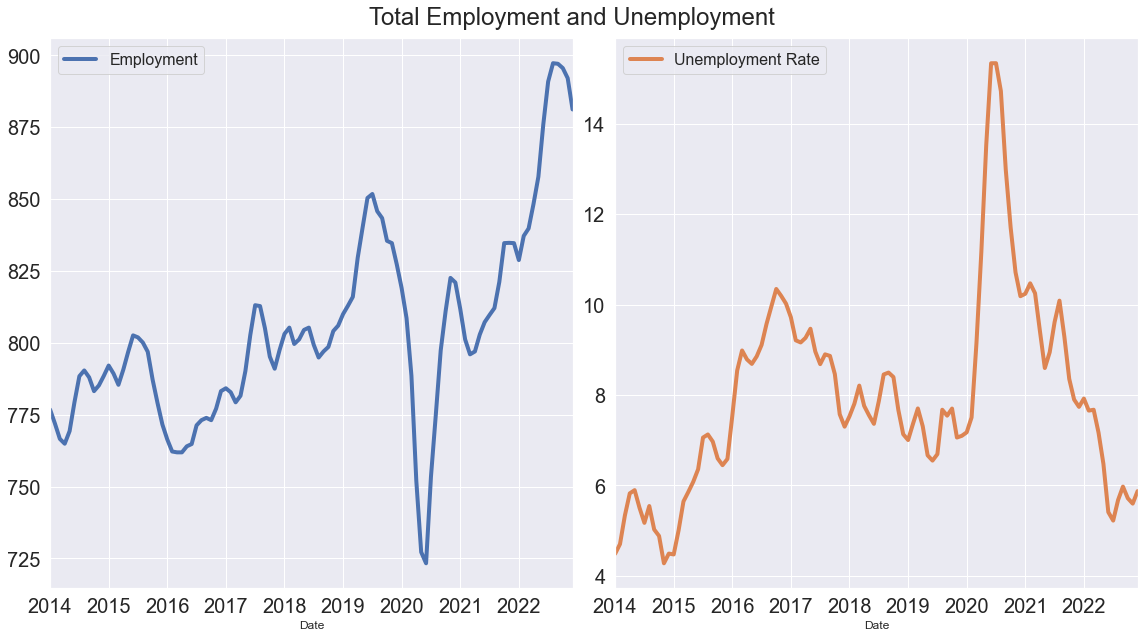

In [105]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,9))
fig.suptitle('Total Employment and Unemployment', fontsize=24)

cal_pivot[['Employment','Unemployment Rate']]['2014':].plot(subplots=True,xlabel='Date',linewidth=4,ax=ax)
plt.rc('xtick', labelsize=20)       # Controls x Tick Labels
plt.rc('ytick', labelsize=20) 
for axs in fig.axes:

   current_values = axs.get_yticks()
   axs.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
   axs.legend(fontsize='16')
plt.tight_layout()
plt.savefig('kbase_graphs/bild_employment.png')

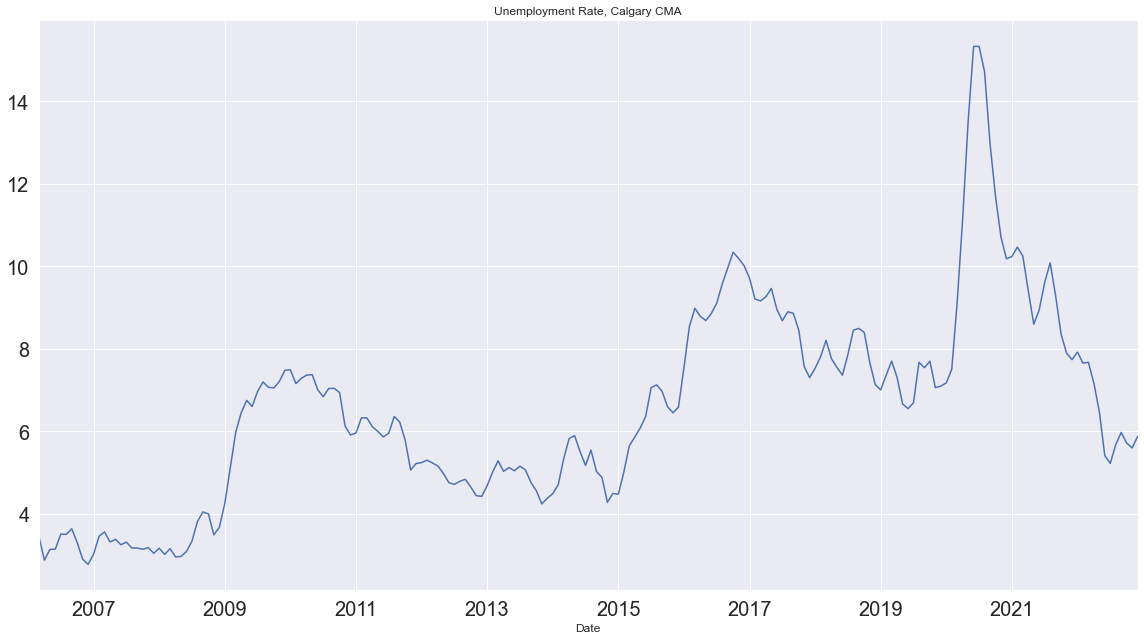

In [100]:
cal_pivot['Unemployment Rate'].plot(figsize=(16,9), title='Unemployment Rate, Calgary CMA')
plt.tight_layout()
plt.savefig('kbase_graphs/cal_cma_unemploy_rate.png')

A similar view with the unemployment rate.

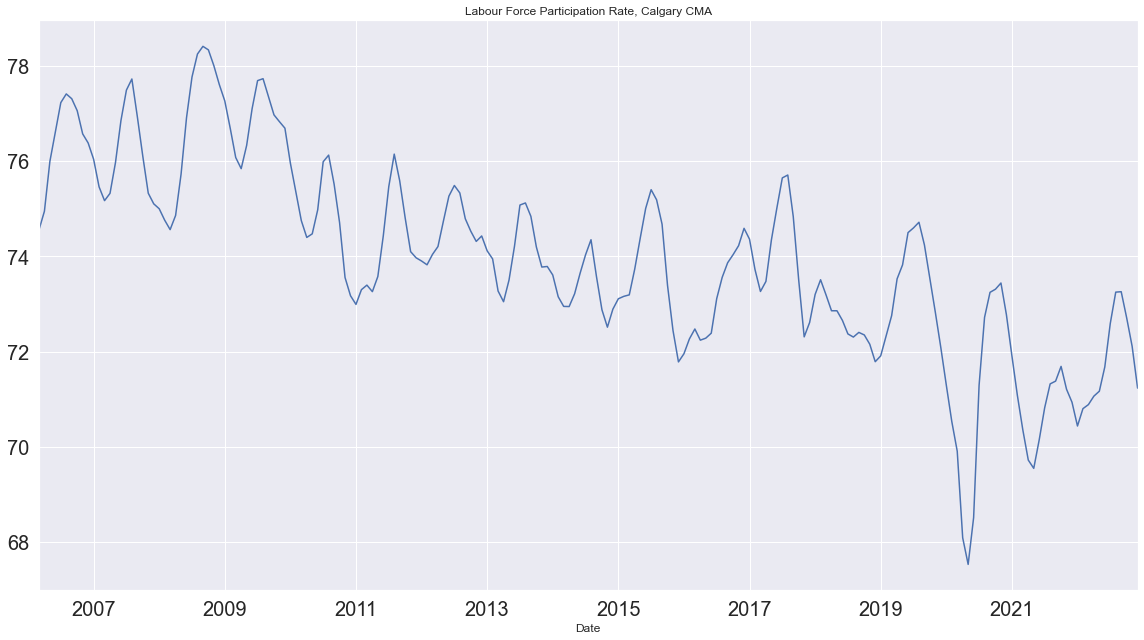

In [101]:
cal_pivot['Participation Rate'].plot(figsize=(16,9), title='Labour Force Participation Rate, Calgary CMA')
plt.tight_layout()

plt.savefig('kbase_graphs/cal_participation_rate.png')

Interestingly, labour force participation has been on a downtrend since 2009, and is still well below pre-COVID levels currently. While it has bounced back from the lows in March 2020, a significant part of the population is still shying away from the workforce.

In [22]:
cal_pivot.tail(36)

,Population,Labour force,Employment,Full-time employment,Part-time employment,Unemployment,Not in labour force,Participation Rate,Unemployment Rate,Employment Rate
Date,,,,,,,,,,
2020-01-01,1237.5,882.3,819.0,657.3,161.7,63.3,355.1,71.296970,7.174430,92.825570
2020-02-01,1239.4,874.2,808.6,651.4,157.2,65.6,365.2,70.534129,7.504004,92.495996
2020-03-01,1241.5,867.9,788.6,647.3,141.3,79.4,373.6,69.907370,9.148519,90.863003
2020-04-01,1243.4,846.6,752.0,627.5,124.5,94.5,396.8,68.087502,11.162296,88.825892
2020-05-01,1245.1,840.8,727.2,614.0,113.2,113.7,404.3,67.528713,13.522835,86.489058
2020-06-01,1246.8,854.2,723.3,616.3,107.0,131.0,392.6,68.511389,15.335987,84.675720
2020-07-01,1248.4,890.0,753.4,635.6,117.8,136.5,358.4,71.291253,15.337079,84.651685
2020-08-01,1249.9,908.9,775.1,653.5,121.6,133.8,341.0,72.717817,14.721091,85.278909
2020-09-01,1251.3,916.5,797.4,662.5,134.9,119.0,334.9,73.243826,12.984179,87.004910


## 15-24 Labour

In [23]:
cal_15to24 = cal_unadj[cal_unadj['Age group']=='15 to 24 years']

cal_15to24_pivot =cal_15to24.pivot(index='Date', columns = ['Labour force characteristics'],values ='VALUE')
cal_15to24_pivot.columns=cal_15to24_pivot.columns.tolist()
cal_15to24_pivot['Participation Rate']=(cal_15to24_pivot['Labour force']/cal_15to24_pivot['Population'])*100
cal_15to24_pivot['Unemployment Rate']=(cal_15to24_pivot['Unemployment']/cal_15to24_pivot['Labour force'])*100
cal_15to24_pivot['Employment Rate']=(cal_15to24_pivot['Employment']/cal_15to24_pivot['Labour force'])*100
cal_15to24_pivot.tail(12)

,Population,Labour force,Employment,Full-time employment,Part-time employment,Unemployment,Not in labour force,Participation Rate,Unemployment Rate,Employment Rate
Date,,,,,,,,,,
2022-01-01,195.3,116.4,101.8,44.9,56.9,14.6,78.9,59.600614,12.542955,87.457045
2022-02-01,196.6,117.3,103.4,43.2,60.2,13.9,79.2,59.664293,11.849957,88.150043
2022-03-01,200.0,118.2,103.2,37.5,65.6,15.1,81.8,59.100000,12.774958,87.309645
2022-04-01,197.9,117.8,104.3,35.9,68.4,13.5,80.1,59.525013,11.460102,88.539898
2022-05-01,191.6,116.9,103.9,41.8,62.1,13.1,74.7,61.012526,11.206159,88.879384
2022-06-01,189.6,121.4,110.0,53.1,56.9,11.4,68.1,64.029536,9.390445,90.609555
2022-07-01,187.9,127.6,111.9,67.7,44.1,15.7,60.3,67.908462,12.304075,87.695925
2022-08-01,191.4,131.5,113.1,71.8,41.3,18.4,59.9,68.704284,13.992395,86.007605
2022-09-01,186.5,121.7,101.8,62.0,39.9,19.9,64.8,65.254692,16.351684,83.648316


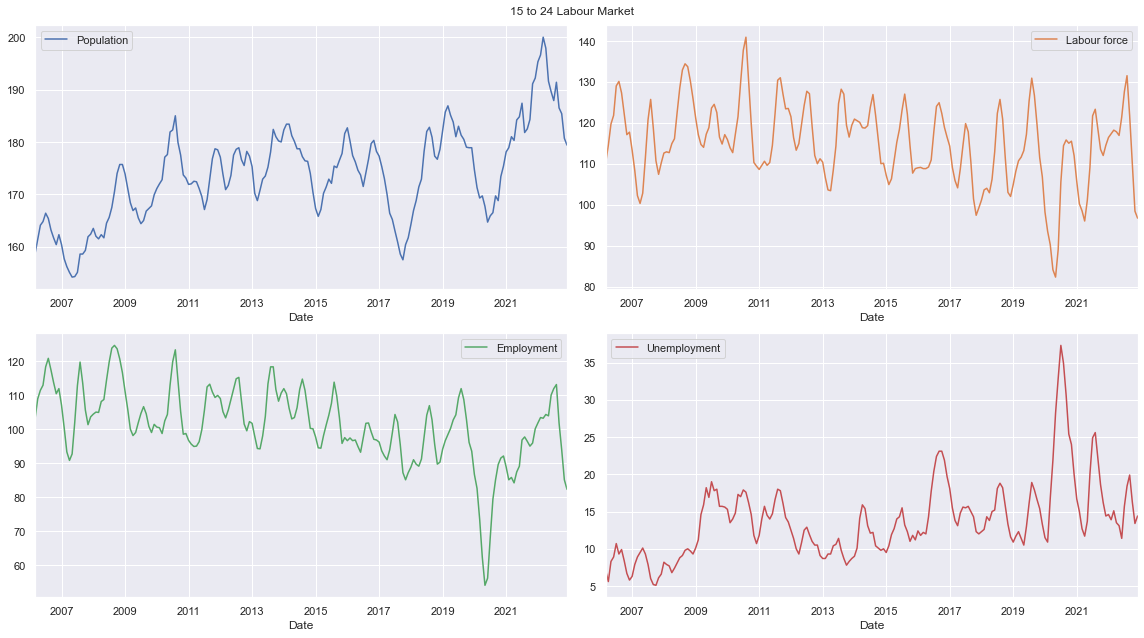

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,9))

cal_15to24_pivot[['Population','Labour force', 'Employment','Unemployment']].plot(ax= axes,subplots=True, title = '15 to 24 Labour Market')
plt.tight_layout()
plt.savefig('kbase_graphs/15to24market.png')

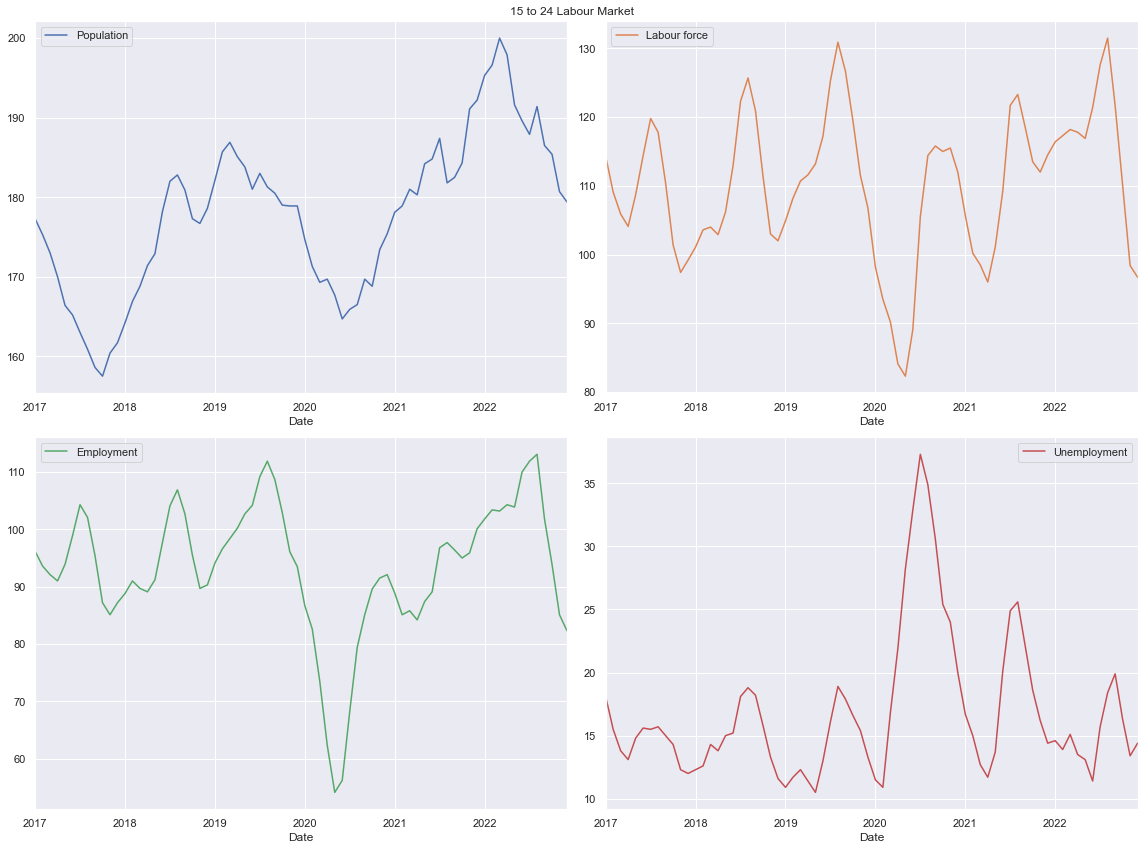

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,12))

cal_15to24_pivot['2017':][['Population','Labour force', 'Employment','Unemployment']].plot(ax= axes,subplots=True, title = '15 to 24 Labour Market')
plt.tight_layout()
plt.savefig('kbase_graphs/15to24market_recent.png')

Estimated population in the 15 to 24 age bracket finally broke out to all time highs in 2021, after over 10 years of stagnation between a range. As this happened, employment and labour force has returned to similar pre-COVID levels. 

This may indicate a higher propensity of younger age people in working, or looking for work post-pandemic heights.

As the most likely age group to be renters - employment in the 15 to 24 cohort is an important indicator for rental demand.

In [26]:
cal_unadj[cal_unadj['Age group']=='25 to 44 years']

,Date,Labour force characteristics,Age group,UOM,VALUE
8913,2006-03-01,Population,25 to 44 years,Persons,367.1
8940,2006-03-01,Labour force,25 to 44 years,Persons,318.4
8967,2006-03-01,Employment,25 to 44 years,Persons,310.1
8994,2006-03-01,Full-time employment,25 to 44 years,Persons,284.4
9021,2006-03-01,Part-time employment,25 to 44 years,Persons,25.7
...,...,...,...,...,...
2016957,2022-12-01,Employment,25 to 44 years,Persons,448.1
2016984,2022-12-01,Full-time employment,25 to 44 years,Persons,398.2
2017011,2022-12-01,Part-time employment,25 to 44 years,Persons,49.9
2017038,2022-12-01,Unemployment,25 to 44 years,Persons,24.5


## 25 to 44 Labour Market

In [27]:
cal_25to44 = (cal_unadj[cal_unadj['Age group']=='25 to 44 years']) #-(cal_unadj[cal_unadj['Age group']=='25 to 44 years'])
cal_25to44_pivot =cal_25to44.pivot(index='Date', columns = ['Labour force characteristics'],values ='VALUE')

cal_25to44_pivot.columns=cal_25to44_pivot.columns.tolist()
cal_25to44_pivot['Participation Rate']=(cal_25to44_pivot['Labour force']/cal_25to44_pivot['Population'])*100
cal_25to44_pivot['Unemployment Rate']=(cal_25to44_pivot['Unemployment']/cal_25to44_pivot['Labour force'])*100
cal_25to44_pivot['Employment Rate']=(cal_25to44_pivot['Employment']/cal_25to44_pivot['Labour force'])*100
cal_25to44_pivot.tail(12)


,Population,Labour force,Employment,Full-time employment,Part-time employment,Unemployment,Not in labour force,Participation Rate,Unemployment Rate,Employment Rate
Date,,,,,,,,,,
2022-01-01,477.5,420.9,395.8,340.6,55.2,25.0,56.6,88.146597,5.939653,94.036588
2022-02-01,485.6,430.3,404.3,345.6,58.8,26.0,55.3,88.612026,6.042296,93.957704
2022-03-01,489.2,435.2,407.5,347.9,59.6,27.8,53.9,88.961570,6.387868,93.635110
2022-04-01,497.2,440.1,415.0,357.5,57.5,25.1,57.2,88.515688,5.703249,94.296751
2022-05-01,503.1,445.4,423.1,372.0,51.1,22.2,57.8,88.531107,4.984284,94.993264
2022-06-01,512.0,451.9,432.8,384.2,48.7,19.0,60.2,88.261719,4.204470,95.773401
2022-07-01,524.3,462.5,443.1,399.3,43.8,19.4,61.7,88.212855,4.194595,95.805405
2022-08-01,526.6,464.8,442.8,402.3,40.5,22.0,61.8,88.264337,4.733219,95.266781
2022-09-01,530.9,472.8,448.5,408.4,40.1,24.3,58.0,89.056319,5.139594,94.860406


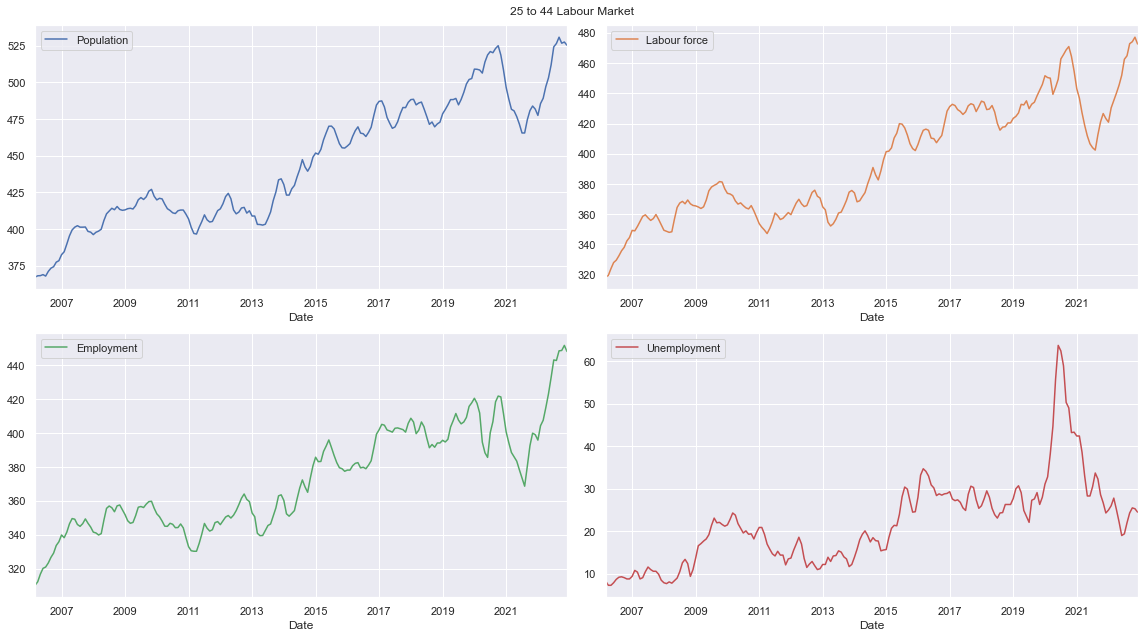

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,9))

cal_25to44_pivot[['Population','Labour force', 'Employment','Unemployment']].plot(ax= axes,subplots=True,title = '25 to 44 Labour Market')
plt.tight_layout()
plt.savefig('kbase_graphs/25to44market.png')

Conversely, the population estimate for the 25 to 44 cohort is still well below pre-COVID highs. Similarly, the labour force has not recovered to pre-COVID levels. While unemployment has fallen, total employment levels remain slightly below 2019 highs. 

As this population cohort are the most likely to be first-time homebuyers, weaker employment conditions may result in less relative demand for entry-level homes.

In [29]:
cal_unadj['Age group'].unique()

['15 years and over', '15 to 24 years', '25 years and over', '25 to 44 years', '45 years and over', '25 to 54 years', '55 years and over', '55 to 64 years', '65 years and over']
Categories (9, object): ['15 years and over', '15 to 24 years', '25 years and over', '25 to 44 years', ..., '25 to 54 years', '55 years and over', '55 to 64 years', '65 years and over']

In [30]:
cal_45over = (cal_unadj[cal_unadj['Age group']=='45 years and over'])
cal_45over_pivot =cal_45over.pivot(index='Date', columns = ['Labour force characteristics'],values ='VALUE')

cal_45over_pivot.columns=cal_45over_pivot.columns.tolist()
cal_45over_pivot['Participation Rate']=(cal_45over_pivot['Labour force']/cal_45over_pivot['Population'])*100
cal_45over_pivot['Unemployment Rate']=(cal_45over_pivot['Unemployment']/cal_45over_pivot['Labour force'])*100
cal_45over_pivot['Employment Rate']=(cal_45over_pivot['Employment']/cal_45over_pivot['Labour force'])*100
cal_45over_pivot.tail(12)


,Population,Labour force,Employment,Full-time employment,Part-time employment,Unemployment,Not in labour force,Participation Rate,Unemployment Rate,Employment Rate
Date,,,,,,,,,,
2022-01-01,605.1,362.9,331.3,284.2,47.1,31.6,242.3,59.973558,8.707633,91.292367
2022-02-01,598.4,358.9,329.4,280.8,48.7,29.5,239.4,59.976604,8.219560,91.780440
2022-03-01,594.0,356.1,329.1,279.4,49.8,27.0,237.9,59.949495,7.582140,92.417860
2022-04-01,590.8,356.0,329.0,277.3,51.7,26.9,234.8,60.257278,7.556180,92.415730
2022-05-01,594.1,354.9,330.8,275.3,55.5,24.1,239.2,59.737418,6.790645,93.209355
2022-06-01,590.3,352.7,333.1,275.5,57.5,19.7,237.6,59.749280,5.585483,94.442869
2022-07-01,583.0,349.9,336.0,280.0,56.0,14.0,233.0,60.017153,4.001143,96.027436
2022-08-01,580.6,355.0,341.4,287.5,53.9,13.5,225.6,61.143645,3.802817,96.169014
2022-09-01,585.0,359.5,346.7,291.7,55.1,12.8,225.5,61.452991,3.560501,96.439499


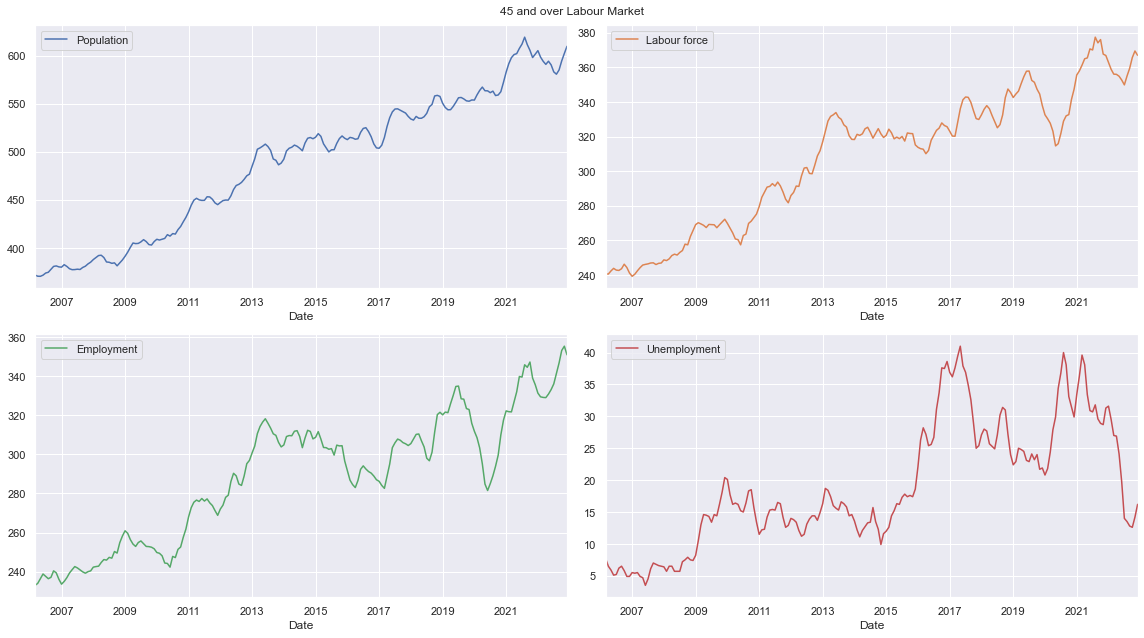

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,9))

cal_45over_pivot[['Population','Labour force', 'Employment','Unemployment']].plot(ax= axes,subplots=True,title = '45 and over Labour Market')
plt.tight_layout()
plt.savefig('kbase_graphs/45plusmarket.png')

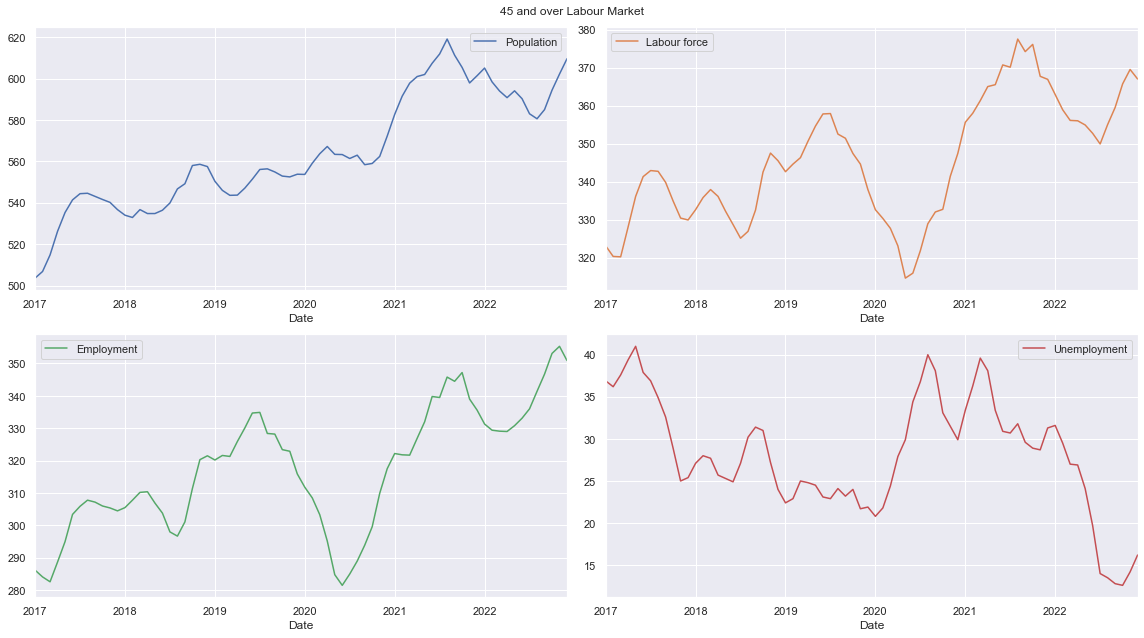

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,9))

cal_45over_pivot['2017':][['Population','Labour force', 'Employment','Unemployment']].plot(ax= axes,subplots=True,title = '45 and over Labour Market')
plt.tight_layout()
plt.savefig('kbase_graphs/45plusmarket_close.png')

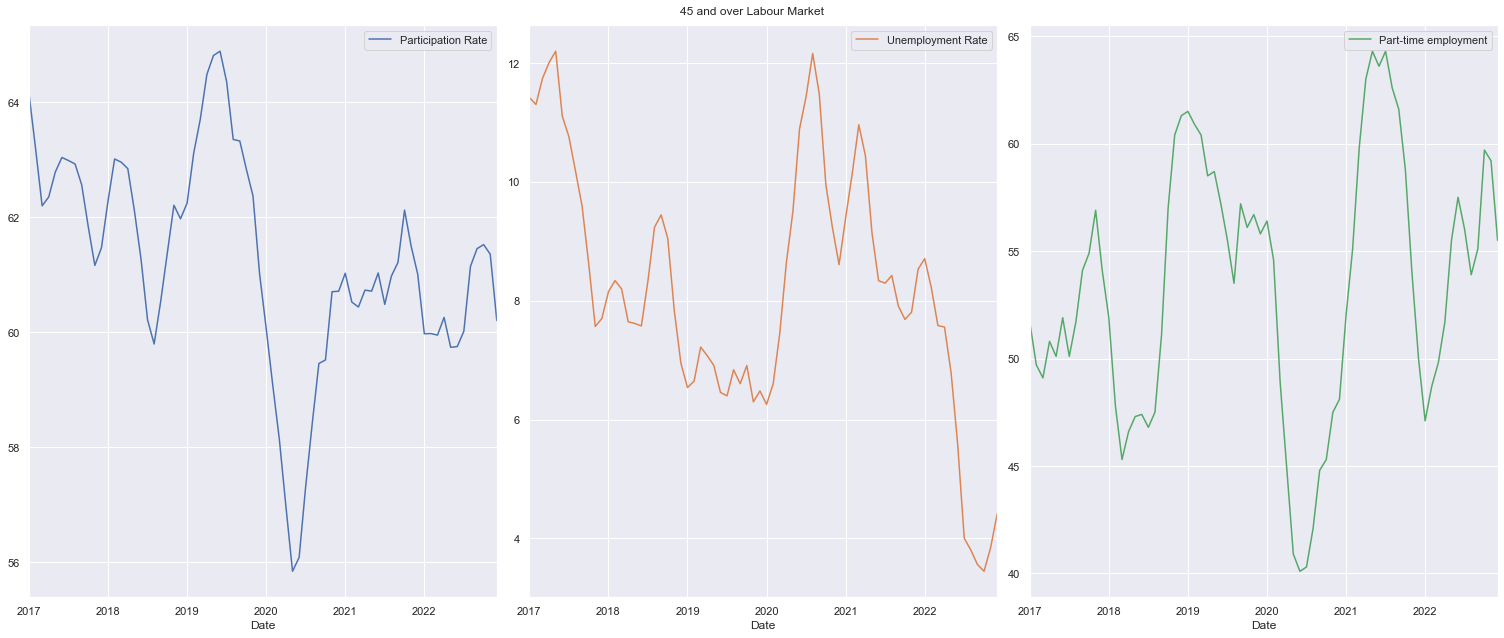

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(21,9))

cal_45over_pivot['2017':][['Participation Rate','Unemployment Rate','Part-time employment']].plot(ax= axes,subplots=True,title = '45 and over Labour Market')
plt.tight_layout()
plt.savefig('kbase_graphs/45plusmarket_rate_close.png')

In [34]:
cal_55over = (cal_unadj[cal_unadj['Age group']=='55 years and over'])
cal_55over_pivot =cal_55over.pivot(index='Date', columns = ['Labour force characteristics'],values ='VALUE')

cal_55over_pivot.columns=cal_55over_pivot.columns.tolist()
cal_55over_pivot['Participation Rate']=(cal_55over_pivot['Labour force']/cal_55over_pivot['Population'])*100
cal_55over_pivot['Unemployment Rate']=(cal_55over_pivot['Unemployment']/cal_55over_pivot['Labour force'])*100
cal_55over_pivot['Employment Rate']=(cal_55over_pivot['Employment']/cal_55over_pivot['Labour force'])*100
cal_55over_pivot.tail(12)


,Population,Labour force,Employment,Full-time employment,Part-time employment,Unemployment,Not in labour force,Participation Rate,Unemployment Rate,Employment Rate
Date,,,,,,,,,,
2022-01-01,381.2,164.3,146.9,117.2,29.7,17.3,217.0,43.100735,10.529519,89.409617
2022-02-01,377.0,162.4,146.3,115.4,30.8,16.2,214.6,43.076923,9.975369,90.086207
2022-03-01,370.7,157.8,144.3,114.7,29.6,13.5,212.9,42.568114,8.555133,91.444867
2022-04-01,369.8,158.9,146.0,114.8,31.2,12.9,210.8,42.969173,8.118313,91.881687
2022-05-01,370.7,155.5,143.9,110.8,33.1,11.6,215.2,41.947667,7.459807,92.540193
2022-06-01,367.7,152.4,142.3,108.4,33.9,10.1,215.3,41.446832,6.627297,93.372703
2022-07-01,358.3,147.8,140.5,108.4,32.1,7.3,210.5,41.250349,4.939107,95.060893
2022-08-01,354.4,150.3,143.2,112.4,30.8,7.1,204.1,42.409707,4.723886,95.276114
2022-09-01,357.1,154.5,148.1,115.4,32.7,6.4,202.6,43.265192,4.142395,95.857605


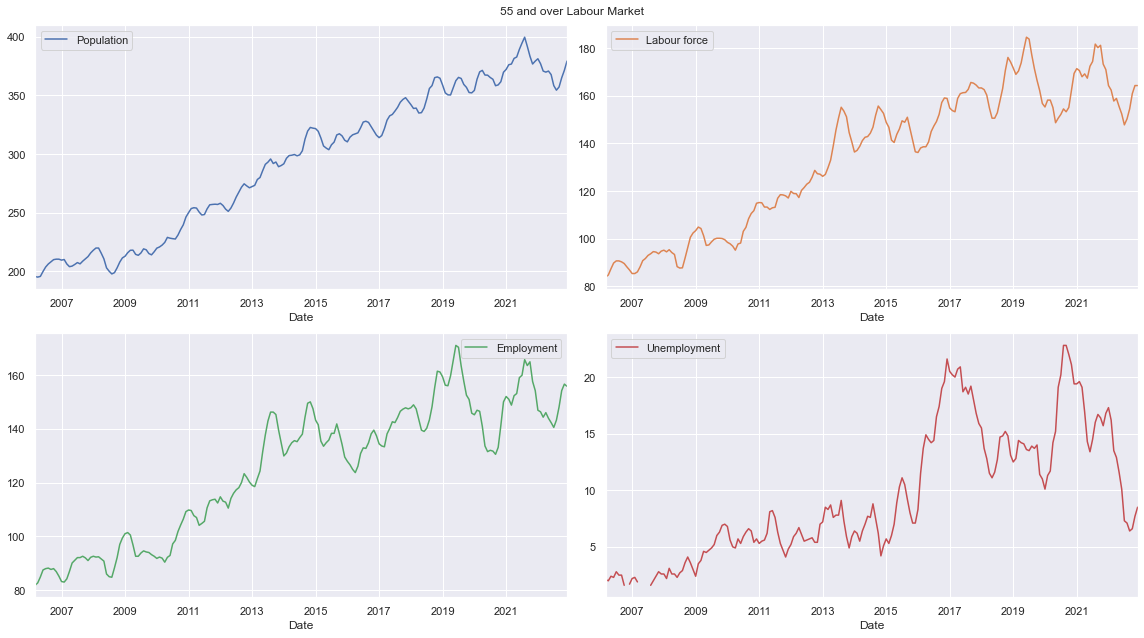

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,9))

cal_55over_pivot[['Population','Labour force', 'Employment','Unemployment']].plot(ax= axes,subplots=True,title = '55 and over Labour Market')
plt.tight_layout()
plt.savefig('kbase_graphs/55plusmarket.png')

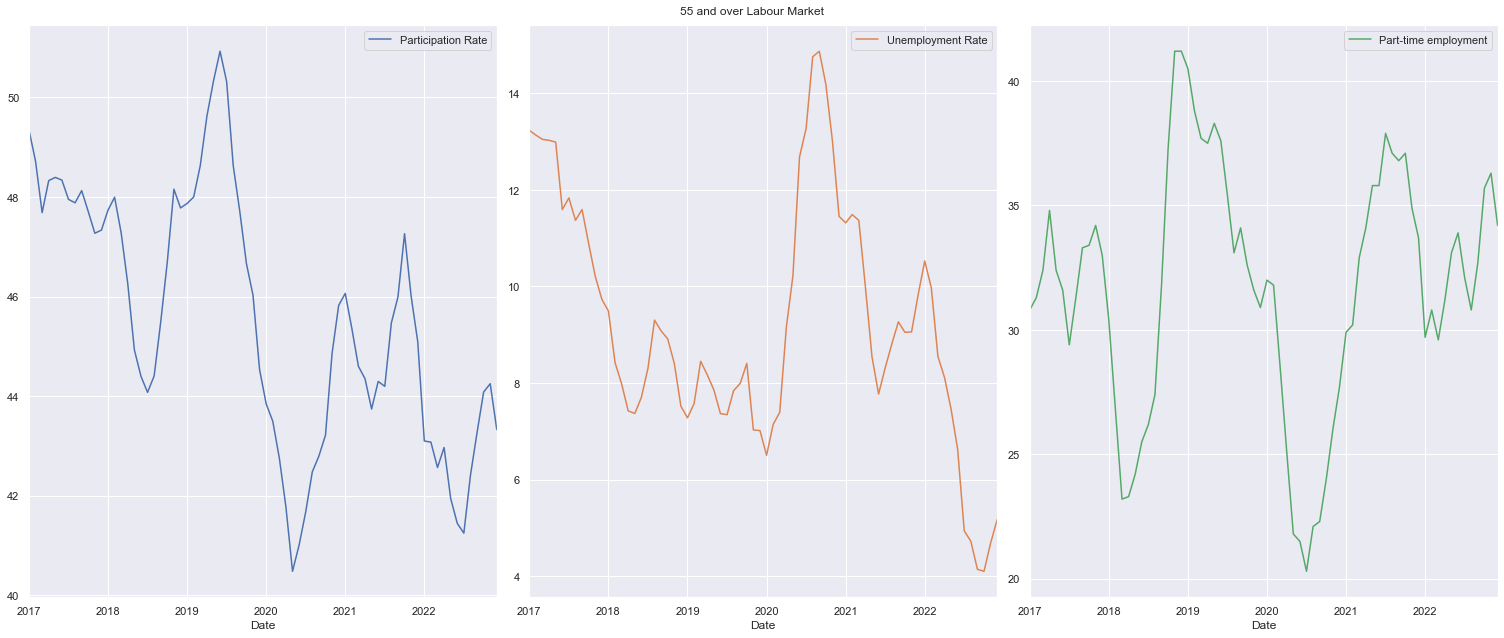

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(21,9))

cal_55over_pivot['2017':][['Participation Rate','Unemployment Rate','Part-time employment']].plot(ax= axes,subplots=True,title = '55 and over Labour Market')
plt.tight_layout()
plt.savefig('kbase_graphs/55plusmarket_rate_close.png')

In [37]:
cal_55over_pivot['Labour force participation']=cal_55over_pivot['Labour force']/cal_55over_pivot['Population']
cal_55over_pivot['Unemployment Rate']

Date
2006-03-01    2.502980
2006-04-01    2.358491
2006-05-01    2.745995
2006-06-01    2.561247
2006-07-01    3.087100
                ...   
2022-08-01    4.723886
2022-09-01    4.142395
2022-10-01    4.101927
2022-11-01    4.686549
2022-12-01    5.173463
Name: Unemployment Rate, Length: 202, dtype: float64

## Job Vacancy & Wage Survey

In [38]:
vacancy = sc.table_to_df('14-10-0325')


In [39]:
vacancy=vacancy.rename({'REF_DATE':'Date'},axis=1)
cal_jwvs=vacancy[vacancy['GEO']=='Calgary, Alberta']
cal_jwvs=cal_jwvs.filter(items = ['Date','Statistics','SCALAR_FACTOR','UOM', 'VALUE','STATUS'])
cal_jwvs_pivot = cal_jwvs.pivot(index='Date', columns = 'Statistics',values ='VALUE')

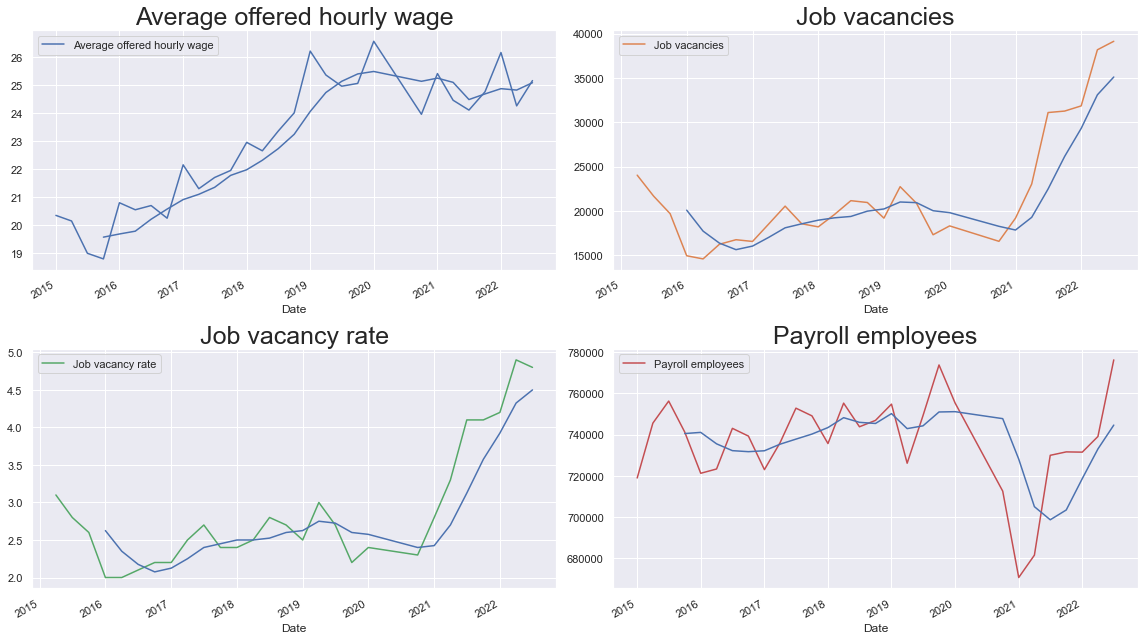

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,9))


cal_jwvs_pivot.plot(ax= axes,subplots=True)
cal_jwvs_pivot.rolling(4).mean().iloc[:,0].plot(ax=axes[0][0])
cal_jwvs_pivot.rolling(4).mean().iloc[:,1].plot(ax=axes[0][1])
cal_jwvs_pivot.rolling(4).mean().iloc[:,2].plot(ax=axes[1][0])
cal_jwvs_pivot.rolling(4).mean().iloc[:,3].plot(ax=axes[1][1])
axes[0][0].set_title(cal_jwvs_pivot.columns[0],fontsize=25)
axes[0][1].set_title(cal_jwvs_pivot.columns[1],fontsize=25)
axes[1][0].set_title(cal_jwvs_pivot.columns[2],fontsize=25)
axes[1][1].set_title(cal_jwvs_pivot.columns[3],fontsize=25)
plt.tight_layout()
plt.savefig('kbase_graphs/calgary_jwvs.png',dpi=300)

In [42]:
cal_jwvs_pivot.tail(8)

Statistics,Average offered hourly wage,Job vacancies,Job vacancy rate,Payroll employees
Date,,,,
2020-10-01,23.95,16560.0,2.3,712590.0
2021-01-01,25.40,19175.0,2.8,670770.0
2021-04-01,24.45,23025.0,3.3,681590.0
2021-07-01,24.10,31090.0,4.1,729935.0
2021-10-01,24.75,31255.0,4.1,731595.0
2022-01-01,26.15,31840.0,4.2,731470.0
2022-04-01,24.25,38170.0,4.9,739055.0
2022-07-01,25.15,39130.0,4.8,776145.0


Data from the Job Vacancy and Wage survey shows that hourly offered wages were climbing in Calgary until late 2019/early 2020. Job vacancies however, have greatly increased as the pandemic subsides, with economic re-opening. While current payroll employees are below pre-COVID levels, if these job vacancies were to go back to pre-COVID averages, employment should reach all time highs. 



## Employment by industry

Source: 14-10-0379-01

In [107]:
ind_emp= sc.table_to_df('14-10-0379-01')
#sc.update_tables()

In [108]:
cal_ind = ind_emp[ind_emp['GEO']=='Calgary, Alberta']
cal_ind=cal_ind.rename({'REF_DATE':'Date'},axis=1)
cal_ind_filt = cal_ind.filter(items = ['Date','North American Industry Classification System (NAICS)','SCALAR_FACTOR','UOM', 'VALUE'])
cal_ind_pivot = cal_ind_filt.pivot(index='Date', columns = 'North American Industry Classification System (NAICS)',values ='VALUE')
cal_ind_pivot.tail(12)

North American Industry Classification System (NAICS),Accommodation and food services [72],"Agriculture [111-112, 1100, 1151-1152]","Business, building and other support services [55-56]",Construction [23],Educational services [61],"Finance, insurance, real estate, rental and leasing [52-53]","Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]",Goods-producing sector,Health care and social assistance [62],"Information, culture and recreation [51, 71]",Manufacturing [31-33],Other services (except public administration) [81],"Professional, scientific and technical services [54]",Public administration [91],Services-producing sector,"Total employed, all industries",Transportation and warehousing [48-49],Utilities [22],Wholesale and retail trade [41-45]
Date,,,,,,,,,,,,,,,,,,,
2022-01-01,40.9,2.6,26.2,79.5,61.5,51.8,49.9,174.0,108.5,31.6,34.2,24.3,96.4,26.1,654.9,828.8,56.9,7.8,130.7
2022-02-01,42.5,2.6,24.1,77.4,62.9,50.4,52.0,172.5,108.0,36.0,33.1,26.0,96.1,27.8,664.7,837.2,55.1,7.4,135.9
2022-03-01,45.2,2.2,24.2,76.5,65.7,46.7,52.8,171.9,104.7,40.0,33.7,24.4,95.9,28.9,667.9,839.8,50.8,6.8,141.5
2022-04-01,48.9,2.1,24.0,76.1,66.1,46.7,53.1,168.7,104.9,40.6,31.1,21.4,100.0,32.0,679.6,848.3,49.3,6.3,145.6
2022-05-01,52.5,2.1,25.2,74.1,66.2,47.5,50.8,164.2,102.3,41.1,30.3,18.5,105.4,34.1,693.6,857.8,52.4,6.9,148.6
2022-06-01,54.3,2.1,25.0,75.8,66.7,51.0,46.5,163.8,101.4,42.1,31.0,20.2,111.1,37.8,712.1,875.9,57.4,8.4,145.0
2022-07-01,54.0,2.3,24.8,79.6,62.3,54.1,42.6,168.8,101.3,42.9,34.6,23.2,117.8,38.5,722.2,890.9,61.9,9.7,141.5
2022-08-01,54.6,2.9,25.6,82.8,57.1,55.6,40.9,173.4,101.9,44.4,36.3,26.5,119.4,40.1,723.9,897.3,60.7,10.4,137.9
2022-09-01,52.5,3.7,25.2,80.1,55.6,55.4,42.2,175.3,108.0,41.7,37.8,25.6,120.2,37.4,721.8,897.1,61.0,11.4,139.3


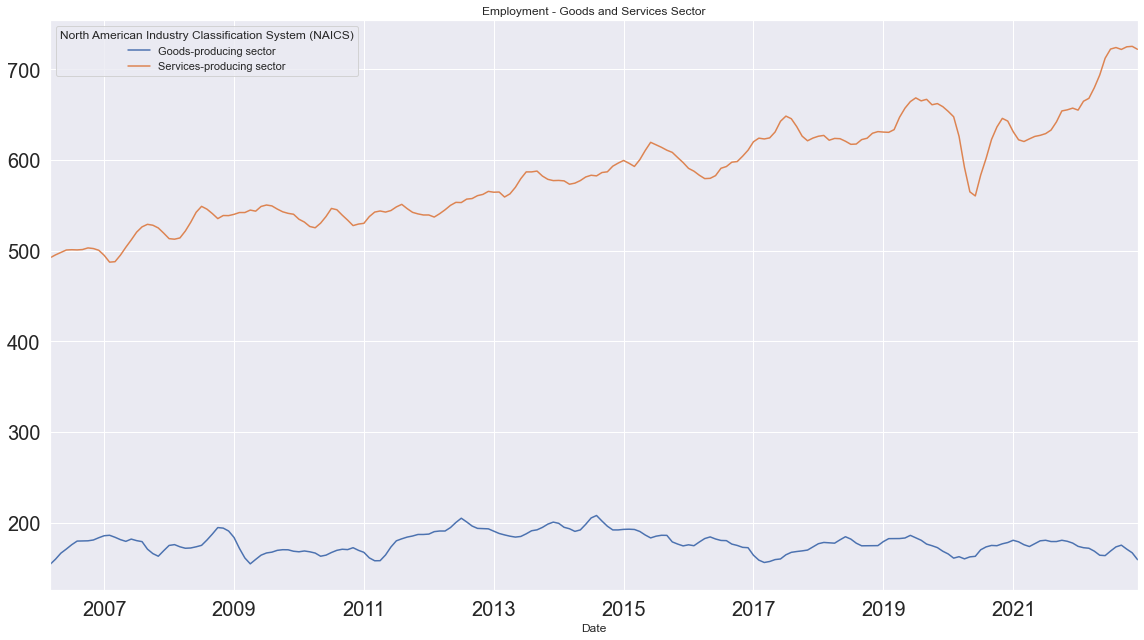

In [109]:
cal_ind_pivot[['Goods-producing sector','Services-producing sector']].plot(figsize=(16,9),xlabel='Date',title='Employment - Goods and Services Sector')
plt.tight_layout()
plt.savefig('kbase_graphs/goods_service.png')

Service sector growth has been steadyily growing for the past 2 decades, while the goods producing sectors saw a clear peak in 2014. While employment in the services sector is approaching pre-COVID highs, goods producing sector continues to be weak. 

This is most likely due to lack of investment in energy related development/businesses since the energy crisis in 2014. 

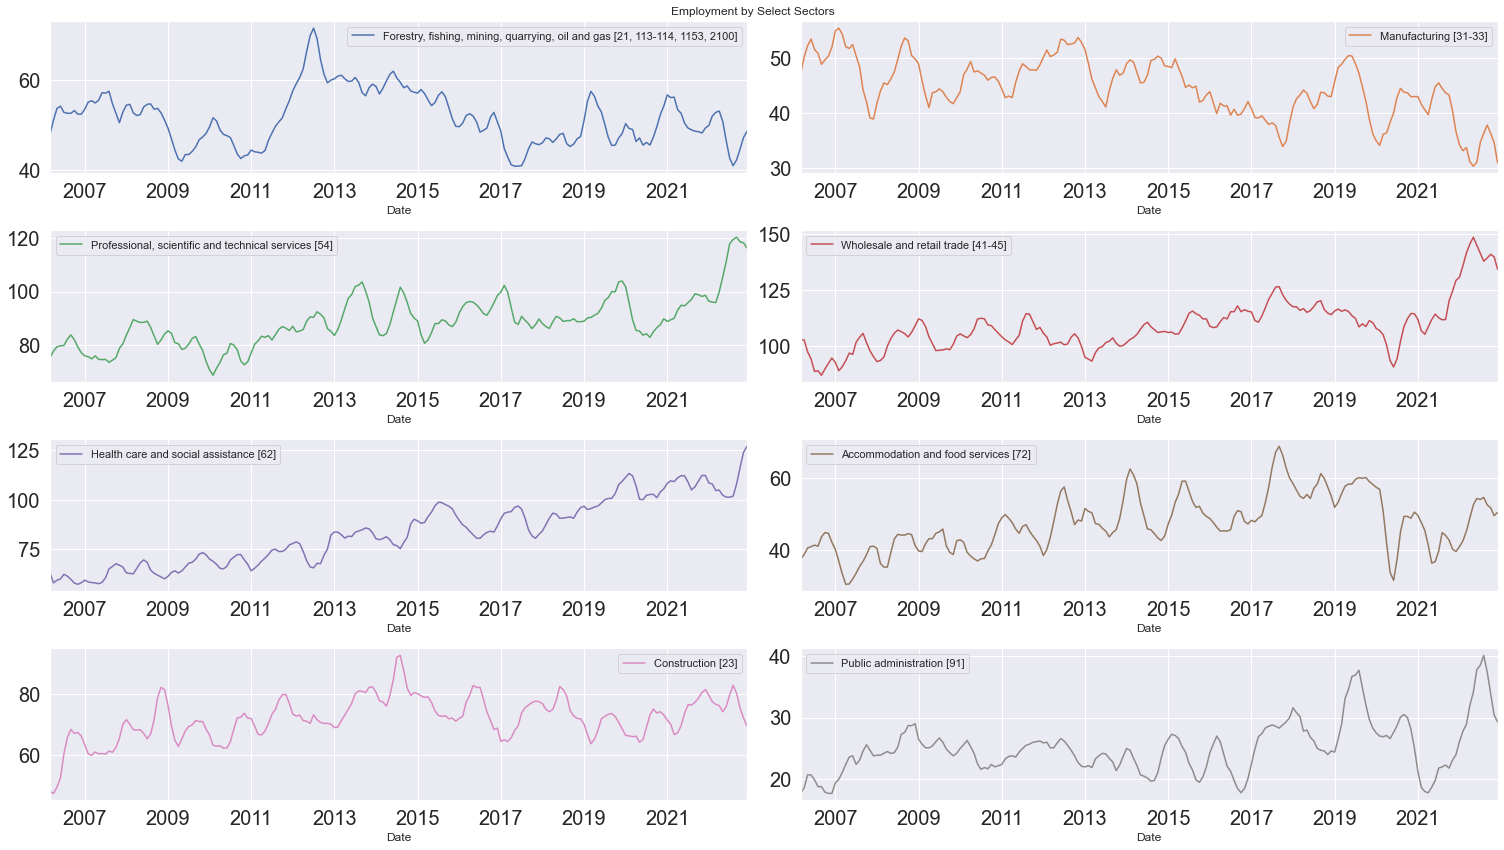

In [110]:
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(21,12))
cal_ind_pivot[['Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]','Manufacturing [31-33]','Professional, scientific and technical services [54]',"Wholesale and retail trade [41-45]",'Health care and social assistance [62]','Accommodation and food services [72]','Construction [23]','Public administration [91]']].plot(ax= axes,subplots=True, title='Employment by Select Sectors')
plt.tight_layout()
plt.savefig('kbase_graphs/sector_employ.png')

The healthcare and social assistance sector has seen the steadiest growth in recent years, with clear boons related to the pandemic. Wholesale and retail trade has also largely increased since the pandemic lows, pointing to increased consumer demand.

On the other hand, accomodation and food services employment is clearly still very weak, indicating a reluctance to increase employment in those businesses before travel demand has clearly returned. 

The Construction industry has also seen relative gains this year, as indicated by strong starts activity in 2020 and 2021.

Oil and gas (raw materials) related unemployment is still well below 2012 highs. It does however seem to be reversing its downtrend in recent years.

c:\Users\Maln\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


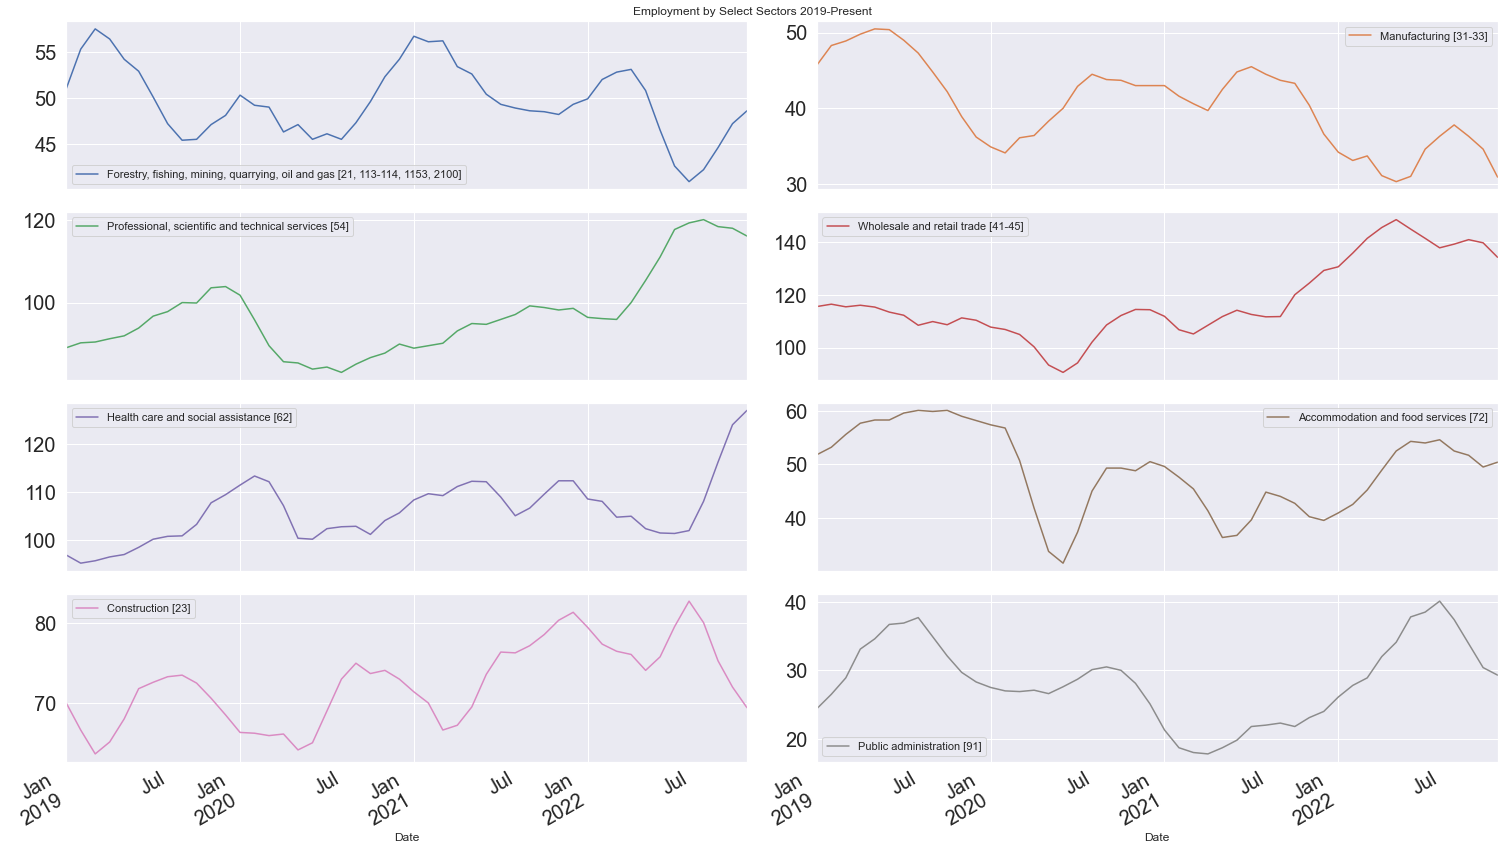

In [111]:
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(21,12))
cal_ind_pivot['2019':][['Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]','Manufacturing [31-33]','Professional, scientific and technical services [54]',"Wholesale and retail trade [41-45]",'Health care and social assistance [62]','Accommodation and food services [72]','Construction [23]','Public administration [91]']].plot(ax=axes, 
subplots=True, title = "Employment by Select Sectors 2019-Present",sharex=True)
plt.tight_layout()
plt.savefig('kbase_graphs/sector_employ_short.png')


A closer look at employment shows more recent and relative trends.

In [112]:
cal_ind_pivot.diff(24)['2019':].tail(12)

North American Industry Classification System (NAICS),Accommodation and food services [72],"Agriculture [111-112, 1100, 1151-1152]","Business, building and other support services [55-56]",Construction [23],Educational services [61],"Finance, insurance, real estate, rental and leasing [52-53]","Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]",Goods-producing sector,Health care and social assistance [62],"Information, culture and recreation [51, 71]",Manufacturing [31-33],Other services (except public administration) [81],"Professional, scientific and technical services [54]",Public administration [91],Services-producing sector,"Total employed, all industries",Transportation and warehousing [48-49],Utilities [22],Wholesale and retail trade [41-45]
Date,,,,,,,,,,,,,,,,,,,
2022-01-01,-16.5,-1.9,-2.0,13.2,-4.8,16.8,-0.4,8.4,-2.9,0.7,-0.7,-5.0,-5.4,-1.4,1.4,9.8,-0.9,-1.7,22.9
2022-02-01,-14.3,-0.1,-2.6,11.2,-2.4,13.4,2.8,11.5,-5.3,4.8,-1.0,-5.8,0.3,0.8,17.1,28.6,-0.6,-1.3,29.0
2022-03-01,-5.5,-0.3,-2.2,10.6,1.5,10.0,3.8,9.3,-7.4,10.2,-2.4,-8.3,6.4,2.0,41.9,51.2,-1.1,-2.3,36.5
2022-04-01,7.1,0.0,-3.7,10.0,5.9,10.0,6.8,8.5,-2.2,12.1,-5.3,-8.5,14.4,4.9,87.8,96.3,2.3,-3.0,45.3
2022-05-01,18.8,-0.1,-4.7,10.0,9.6,9.9,3.7,1.8,2.0,14.3,-8.0,-11.0,20.1,7.5,128.8,130.6,7.4,-3.8,55.2
2022-06-01,22.8,-0.1,-6.2,10.8,15.8,10.6,1.0,0.8,1.3,13.7,-9.0,-10.8,27.3,10.2,151.8,152.6,12.6,-1.8,54.4
2022-07-01,16.7,0.1,-8.4,10.6,16.1,9.8,-3.5,-1.4,-1.0,12.4,-8.3,-12.7,33.5,9.8,138.9,137.5,15.6,-0.3,47.3
2022-08-01,9.6,1.0,-8.6,9.8,16.3,9.9,-4.6,0.0,-0.8,10.7,-8.2,-9.8,36.4,10.0,122.2,122.2,12.5,1.9,35.8
2022-09-01,3.2,NaN,-8.4,5.1,12.0,8.6,-5.1,0.3,5.2,5.5,-6.0,-10.3,35.2,6.9,99.3,99.7,10.8,3.8,30.7


c:\Users\Maln\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


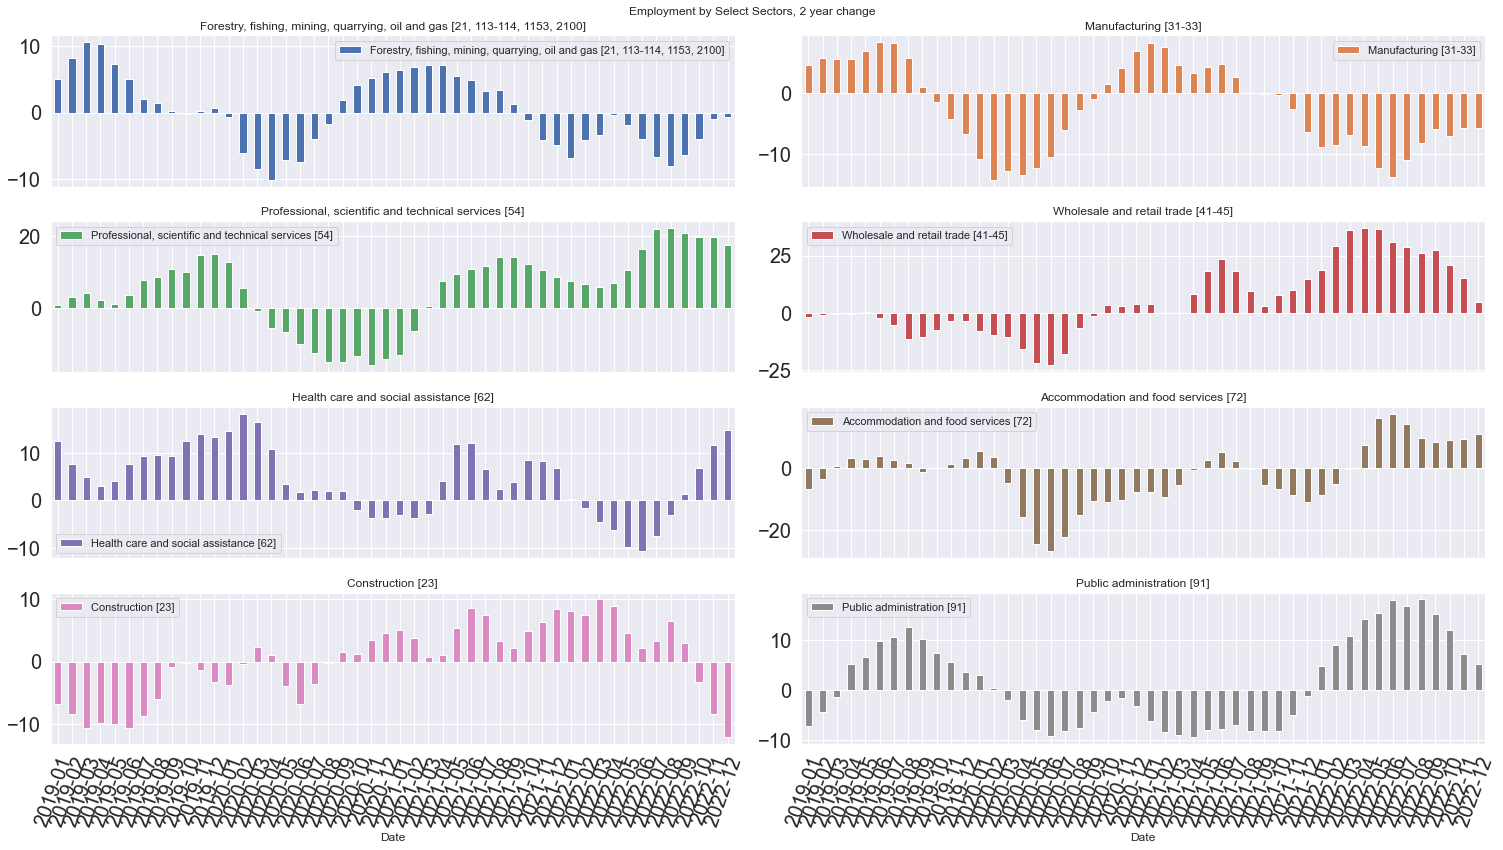

In [113]:
from matplotlib.dates import DateFormatter
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(21,12))
cal_ind_pivot.diff(12)['2019':][['Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]','Manufacturing [31-33]','Professional, scientific and technical services [54]',"Wholesale and retail trade [41-45]",'Health care and social assistance [62]','Accommodation and food services [72]','Construction [23]','Public administration [91]']].plot(ax=axes, 
subplots=True, title = "Employment by Select Sectors, 2 year change", kind = 'bar',sharex=True)


axes[3,1].set_xticklabels(labels=cal_ind_pivot.diff(24)['2019':].index.to_period('M'), rotation=70, rotation_mode="anchor", ha="right")
axes[3,0].set_xticklabels(labels=cal_ind_pivot.diff(24)['2019':].index.to_period('M'), rotation=70, rotation_mode="anchor", ha="right")


plt.tight_layout()
plt.savefig('kbase_graphs/sector_employ_change.png')

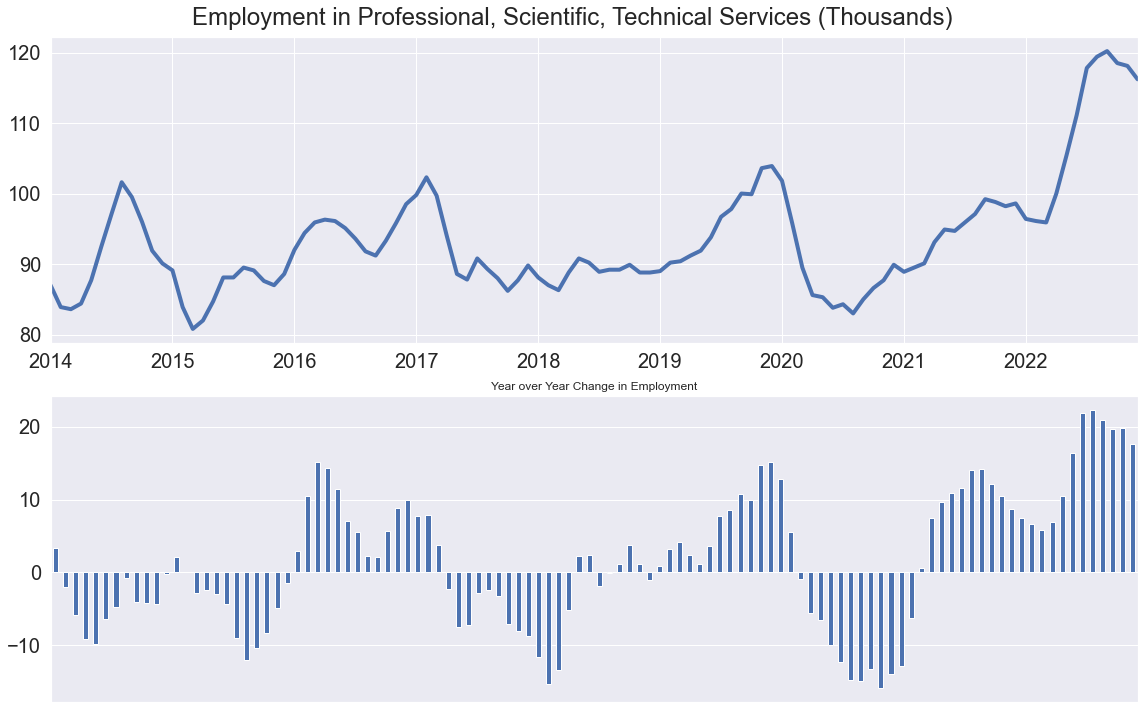

In [133]:
fig, ax = plt.subplots(nrows=2,figsize=(16,10))
fig.suptitle('Employment in Professional, Scientific, Technical Services (Thousands)', fontsize=24)

cal_ind_pivot['2014':]['Professional, scientific and technical services [54]'].plot(ax=ax[0], legend=False, xlabel='', linewidth=4)

cal_ind_pivot.diff(12)['2014':]['Professional, scientific and technical services [54]'].plot(ax=ax[1],title='Year over Year Change in Employment', kind='bar',xlabel='Date')

#ax[0].set_xticklabels(labels=cal_ind_pivot['2019':].index.to_period('A'), rotation_mode="anchor", ha="right")
ax[1].get_xaxis().set_visible(False)
#ax[1].set_xticklabels(labels=cal_ind_pivot['2019':].index.to_period('A'), rotation=70, rotation_mode="anchor", ha="right")


plt.tight_layout()
plt.savefig('kbase_graphs/bild_employment2.png')


In [125]:
cal_ind_pivot['2019':].index.to_period('A')

PeriodIndex(['2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019',
             '2019', '2019', '2019', '2019', '2020', '2020', '2020', '2020',
             '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020',
             '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021',
             '2021', '2021', '2021', '2021', '2022', '2022', '2022', '2022',
             '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022'],
            dtype='period[A-DEC]', name='Date', freq='A-DEC')

A more clear look at recent changes.

## Energy Markets

### Prices

In [50]:
#commodity = pd.read_excel('..\\data\\WTI_CommIndex_Assumptions.xlsx',index_col=0,engine='openpyxl')

In [51]:
#commodity['WTI'][:'2022'].plot(figsize = (16,9),kind='line', title = 'WTI Spot Price')
#plt.tight_layout()
#plt.savefig('kbase_graphs/wti_spot.png')

In [129]:
commodity=pd.read_csv('https://economicdashboard.alberta.ca/Download/DownloadFile?extension=csv&requestUrl=https%3A%2F%2Feconomicdashboard.alberta.ca%2Fapi%2Foilprice')

In [130]:
commodity['When']=pd.to_datetime(commodity.When)
commodity=commodity.pivot(index='When',columns='Type',values='Alberta')

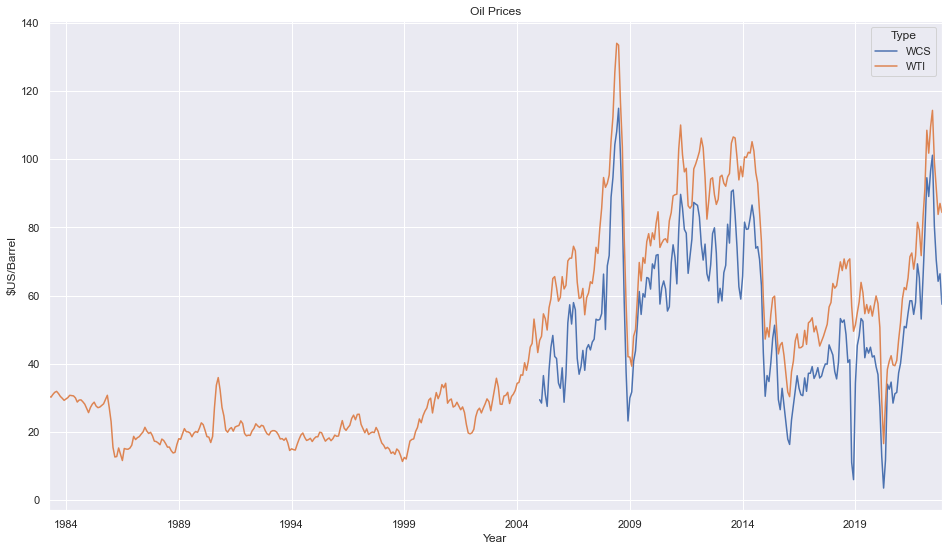

In [54]:
commodity[['WCS','WTI']].plot(figsize = (16,9),kind='line', title = 'Oil Prices',xlabel='Year',ylabel='$US/Barrel')
plt.savefig('kbase_graphs/wti-wcs_spot.png')

In [135]:
commodity['WCS Spread']=commodity['WTI']-commodity['WCS']

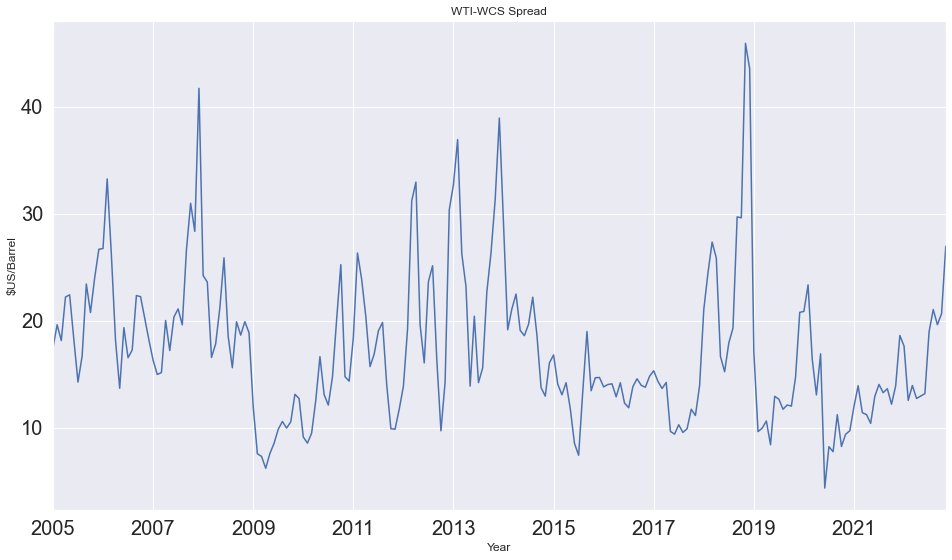

In [136]:
commodity['WCS Spread']['2005':].plot(figsize = (16,9),kind='line', title = 'WTI-WCS Spread',xlabel='Year',ylabel='$US/Barrel')
plt.savefig('kbase_graphs/wti-wcs_spread.png')

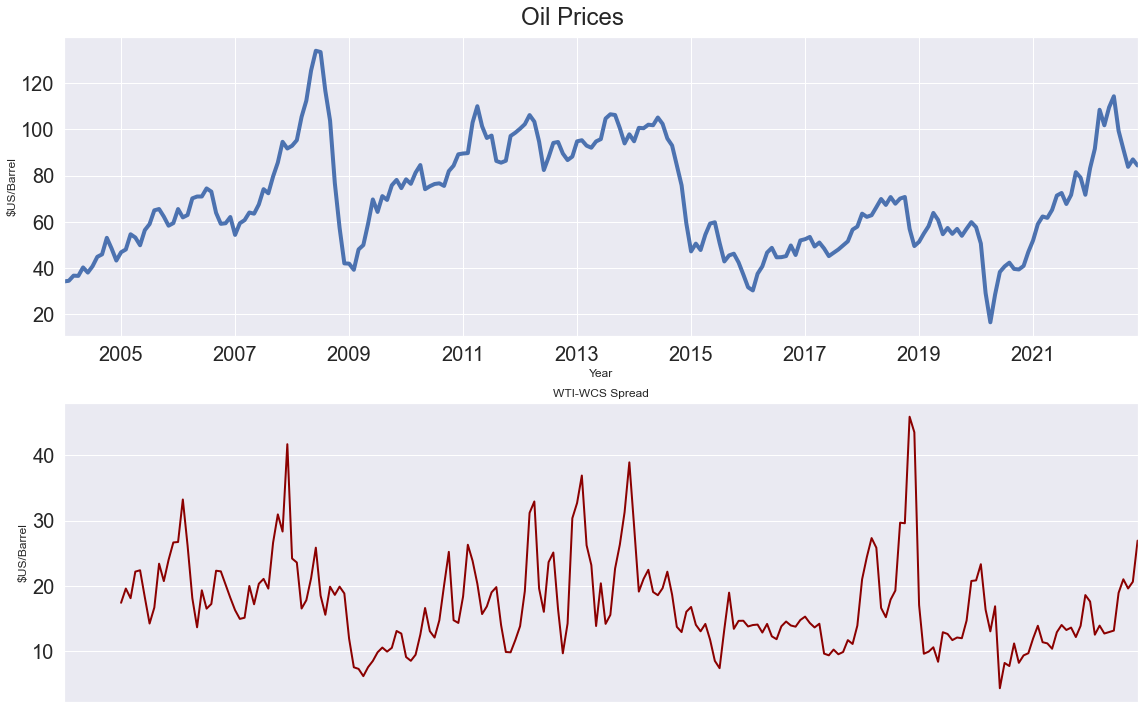

In [144]:
fig, ax = plt.subplots(nrows=2,figsize=(16,10))
fig.suptitle('Oil Prices', fontsize=24)

commodity['2004':]['WTI'].plot(ax=ax[0],kind='line',xlabel='Year',ylabel='$US/Barrel', linewidth = 4)

commodity['2004':]['WCS Spread'].plot(ax=ax[1],title='WTI-WCS Spread', kind='line',xlabel='Date', linewidth = 2,ylabel='$US/Barrel', color = 'DarkRed')

#ax[0].set_xticklabels(labels=cal_ind_pivot['2019':].index.to_period('A'), rotation_mode="anchor", ha="right")
ax[1].get_xaxis().set_visible(False)
#ax[1].set_xticklabels(labels=cal_ind_pivot['2019':].index.to_period('A'), rotation=70, rotation_mode="anchor", ha="right")


plt.tight_layout()
plt.savefig('kbase_graphs/bild_oil.png')


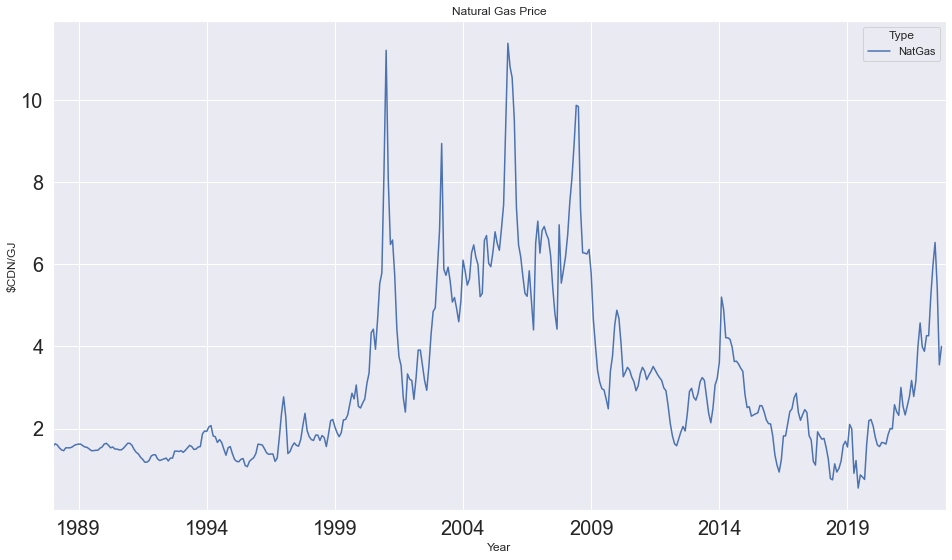

In [139]:
commodity['1988':][['NatGas']].plot(figsize = (16,9),kind='line', title = 'Natural Gas Price',xlabel='Year',ylabel='$CDN/GJ')
plt.savefig('kbase_graphs/natgas_spot.png')

Lastly a look at oil - economic reopening has led to increased demand for oil due to increased travel, transports, shipping and overall consumer demand. Supply on the other hand, has not caught up due to years of underinvestment. This resulted in quickly increasing oil prices admist the backdrop of a geopolitical crisis in Europe. 

Whether this will lead to reinvestment in oil production remains to be seen.

### Crude Supply

In [ ]:
oil_production=pd.read_csv('https://economicdashboard.alberta.ca/Download/DownloadFile?extension=csv&requestUrl=https%3A%2F%2Feconomicdashboard.alberta.ca%2Fapi%2Foilproduction')

In [ ]:

oil_production['When']=pd.to_datetime(oil_production.When)
oil_production=oil_production.pivot(index='When',columns='Type',values='Alberta')

KeyError: 'When'

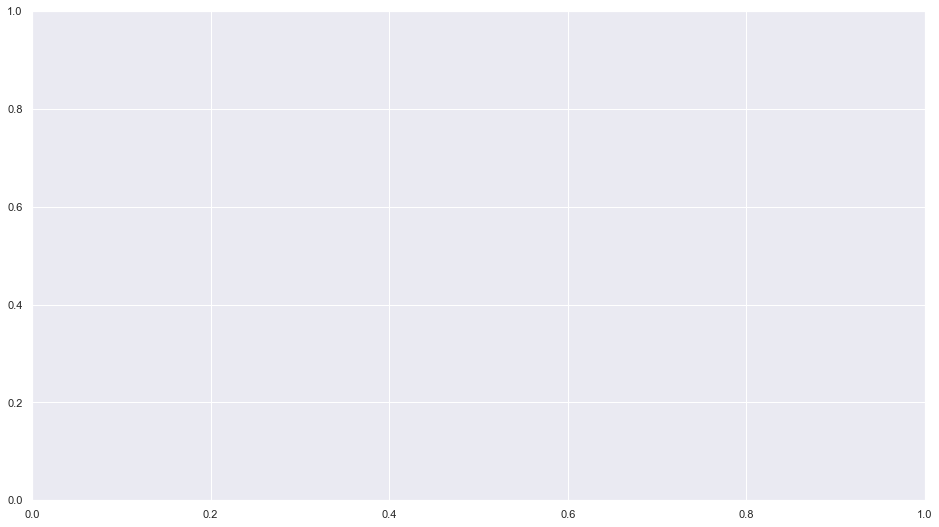

In [ ]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=oil_production['When']['Conventional Oil','Non-Conventional Oil'],linewidth=2.5,ax=ax)
fig.suptitle('Crude Oil Production')
fig.tight_layout()
plt.savefig('crude_prod.png')

In [ ]:
oil_production['Type']['Conventional Oil','Non-Conventional Oil']

KeyError: 'Type'

In [50]:
crude_supply = sc.table_to_df('25-10-0063-01')

In [51]:
crude_supply_ab = crude_supply[crude_supply['GEO']=='Alberta']

In [52]:
crude_supply_ab['Supply and disposition'].unique()

array(['Crude oil production', 'Net Field production of crude oil',
       'Heavy crude oil', 'Light and medium crude oil',
       'Non-upgraded production of crude bitumen',
       'In-Situ crude bitumen production',
       'Mined crude bitumen production',
       'Crude bitumen sent for further processing',
       'Synthetic crude oil production', 'Equivalent products production',
       'Condensate', 'Pentanes plus', 'Imports',
       'Imports of crude oil and equivalent products by refineries',
       'Imports of crude oil and equivalent products by other',
       'Input to canadian refineries',
       'Light and medium crude oil used as an input in refineries',
       'Heavy crude oil used as an input in refineries',
       'Crude bitumen used as an input in refineries',
       'Synthetic crude oil used as an input in refineries', 'Exports',
       'Export to the United States',
       'Export to the United States by pipelines',
       'Export to the United States by other means',

In [53]:
crude_supply_ab=crude_supply_ab[crude_supply_ab['Units of measure']=='Barrels']

In [56]:
crude_supply_ab_pivot=crude_supply_ab.filter(items = ['REF_DATE','Supply and disposition', 'VALUE'])

In [63]:
crude_supply_ab_pivot[crude_supply_ab_pivot['Supply and disposition']=='Crude oil production']

,REF_DATE,Supply and disposition,VALUE
329,2016-01-01,Crude oil production,93846609.0
797,2016-02-01,Crude oil production,86879554.0
1265,2016-03-01,Crude oil production,91368968.0
1731,2016-04-01,Crude oil production,78586724.0
2197,2016-05-01,Crude oil production,62337145.0
...,...,...,...
35141,2021-12-01,Crude oil production,110916560.0
35639,2022-01-01,Crude oil production,107947151.0
36137,2022-02-01,Crude oil production,102691017.0
36635,2022-03-01,Crude oil production,113812887.0


NameError: name 'crude_supply_ab_pivot' is not defined

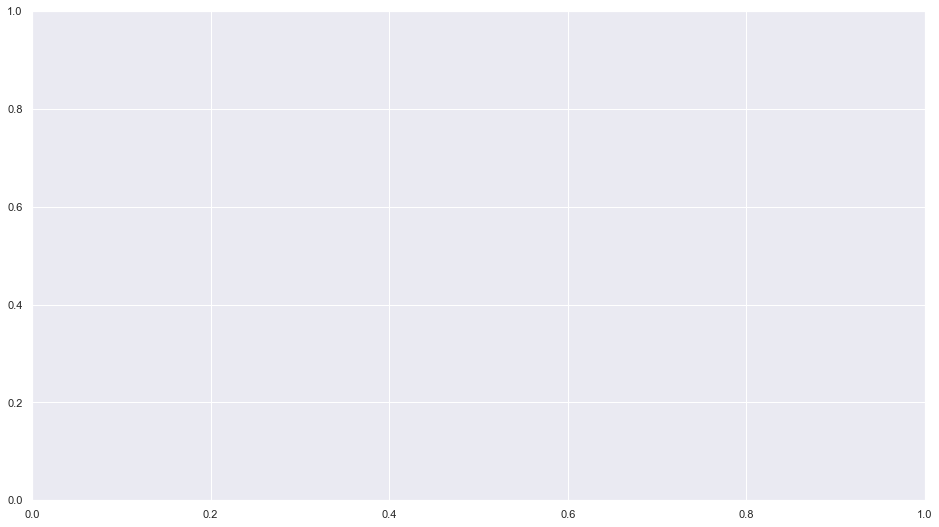

In [17]:
fig,ax=plt.subplots(figsize=(16,9))
oil_prod = crude_supply_ab_pivot[crude_supply_ab_pivot['Supply and disposition']=='Crude oil production']
oil_prod=oil_prod.set_index('REF_DATE')
sns.lineplot(data=oil_prod,linewidth=2.5,ax=ax)
fig.suptitle('Crude Oil Production')
fig.tight_layout()
plt.savefig('/kbase_graphs/crude_prod.png')

NameError: name 'crude_supply_ab_pivot' is not defined

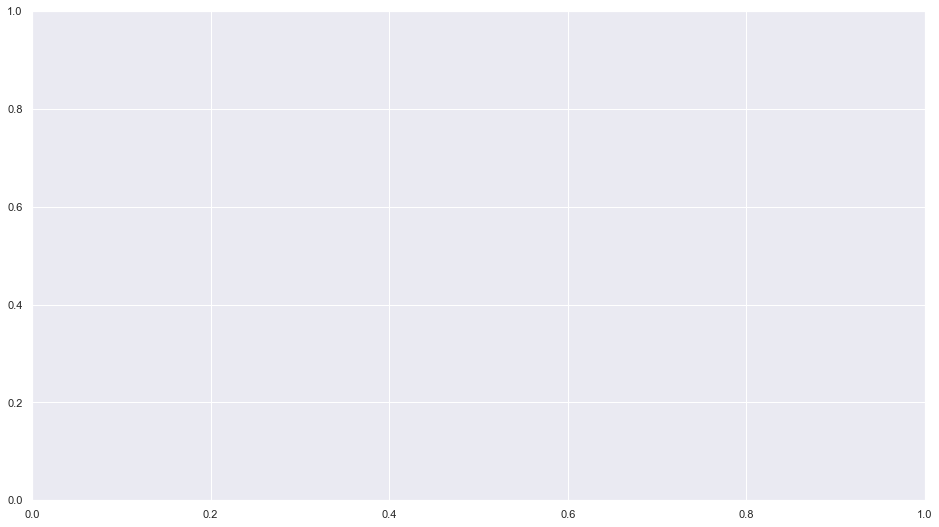

In [18]:
fig,ax=plt.subplots(figsize=(16,9))
oil_prod = crude_supply_ab_pivot[crude_supply_ab_pivot['Supply and disposition']=='Fields and plants']
oil_prod=oil_prod.set_index('REF_DATE')
sns.lineplot(data=oil_prod,linewidth=2.5,ax=ax)
fig.suptitle('Fields and plants')
fig.tight_layout()
plt.savefig('/kbase_graphs/fields_plants.png')

## Construction Costs

In [4]:
building_cost = sc.table_to_df('18-10-0135-01')

18100135-eng.zip: 100%|██████████| 178k/178k [00:00<00:00, 233kB/s] 


In [5]:
building_cost_cal = building_cost[building_cost['GEO']=='Calgary, Alberta']

In [6]:
building_cost_cal['Type of building'].unique()

array(['Residential buildings [621]', 'Apartment buildings',
       'High-rise apartment building (five or more storeys)',
       'Low-rise apartment building (fewer than five storeys)',
       'Single-detached house', 'Townhouse',
       'Non-residential buildings [622]', 'Commercial buildings [62212]',
       'Office building', 'Warehouse', 'Shopping centre',
       'Industrial buildings [62211]', 'Factory',
       'Bus depot with maintenance and repair facilities',
       'Institutional buildings [62213]', 'School'], dtype=object)

In [7]:
building_cost_cal.tail(len(building_cost_cal['Type of building'].unique()))

,REF_DATE,GEO,DGUID,Type of building,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
32016,2022-07-01,"Calgary, Alberta",2016S0503825,Residential buildings [621],"Index, 2017=100",373,units,0,v122668061,10.1,173.8,NaN,NaN,NaN,1
32017,2022-07-01,"Calgary, Alberta",2016S0503825,Apartment buildings,"Index, 2017=100",373,units,0,v122668063,10.3,161.3,NaN,NaN,NaN,1
32018,2022-07-01,"Calgary, Alberta",2016S0503825,High-rise apartment building (five or more sto...,"Index, 2017=100",373,units,0,v122668064,10.4,132.4,NaN,NaN,NaN,1
32019,2022-07-01,"Calgary, Alberta",2016S0503825,Low-rise apartment building (fewer than five s...,"Index, 2017=100",373,units,0,v122668065,10.5,166.6,NaN,NaN,NaN,1
32020,2022-07-01,"Calgary, Alberta",2016S0503825,Single-detached house,"Index, 2017=100",373,units,0,v122668066,10.6,179.1,NaN,NaN,NaN,1
32021,2022-07-01,"Calgary, Alberta",2016S0503825,Townhouse,"Index, 2017=100",373,units,0,v122668067,10.7,185.3,NaN,NaN,NaN,1
32022,2022-07-01,"Calgary, Alberta",2016S0503825,Non-residential buildings [622],"Index, 2017=100",373,units,0,v122668068,10.8,120.0,NaN,NaN,NaN,1
32023,2022-07-01,"Calgary, Alberta",2016S0503825,Commercial buildings [62212],"Index, 2017=100",373,units,0,v122668069,10.9,120.6,NaN,NaN,NaN,1
32024,2022-07-01,"Calgary, Alberta",2016S0503825,Office building,"Index, 2017=100",373,units,0,v122668070,10.10,116.9,NaN,NaN,NaN,1
32025,2022-07-01,"Calgary, Alberta",2016S0503825,Warehouse,"Index, 2017=100",373,units,0,v122668071,10.11,123.0,NaN,NaN,NaN,1


In [8]:
building_cost_cal=building_cost_cal.filter(items = ['REF_DATE','Type of building', 'VALUE'])

In [9]:
building_cost_cal=building_cost_cal.pivot(index='REF_DATE',columns='Type of building',values="VALUE")

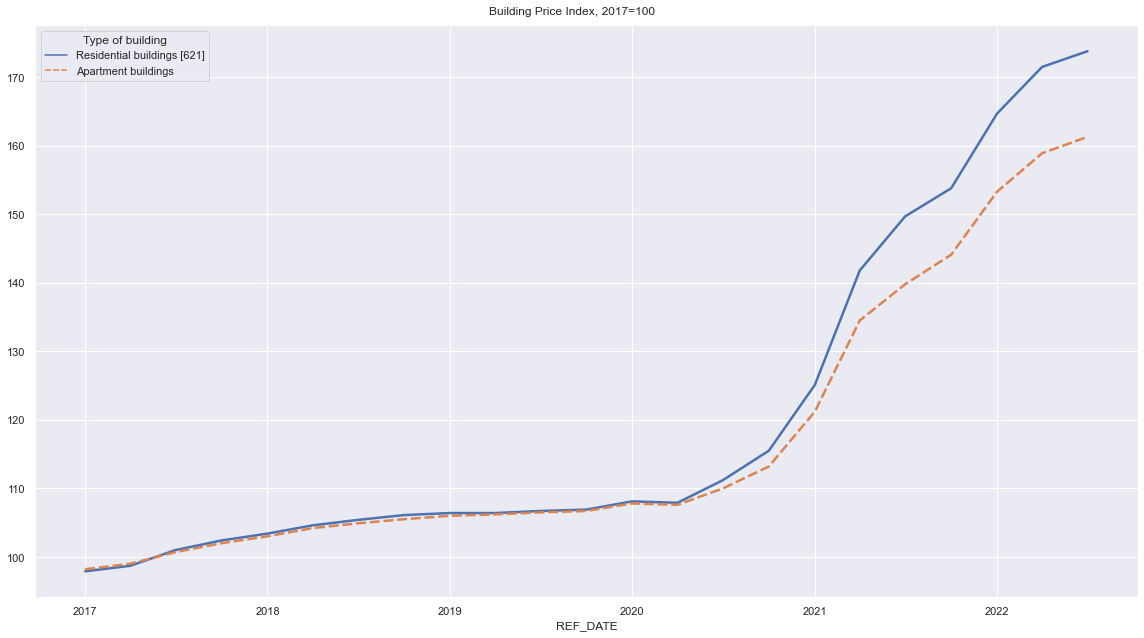

In [11]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=building_cost_cal[['Residential buildings [621]','Apartment buildings']],linewidth=2.5,ax=ax)
fig.suptitle('Building Price Index, 2017=100')
fig.tight_layout()
plt.savefig('kbase_graphs/building_price.png')

Construction costs shot sharply higher shortly after the onset of the pandemic. Residential buildings in general seem to be outpacing the subset of apartment buildings.

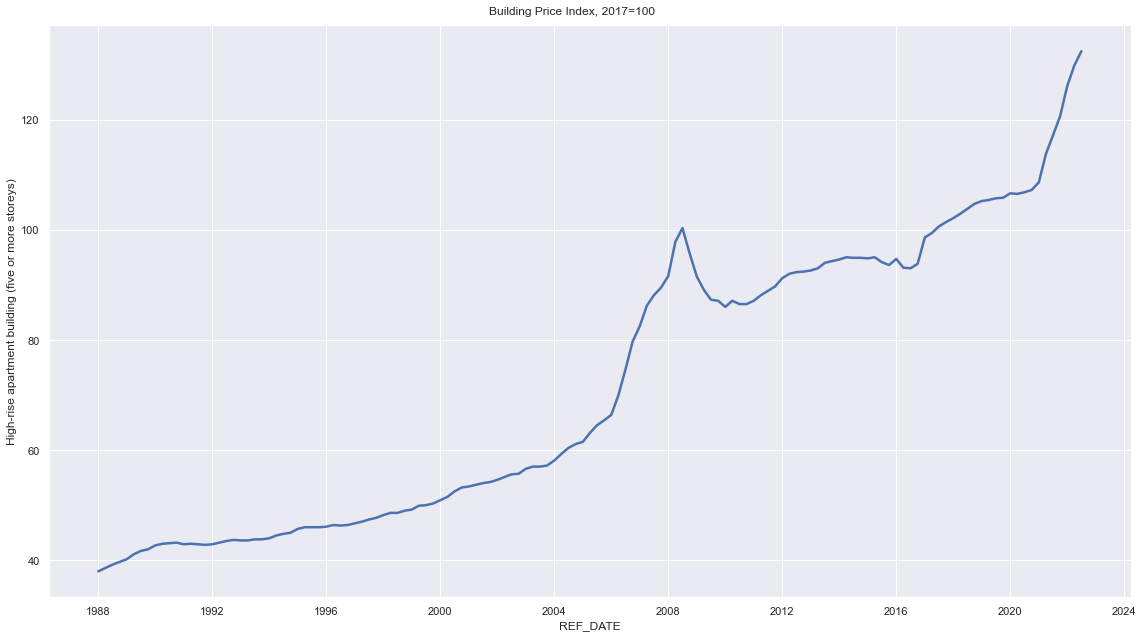

In [13]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=building_cost_cal['High-rise apartment building (five or more storeys)'],linewidth=2.5,ax=ax)
fig.suptitle('Building Price Index, 2017=100')
fig.tight_layout()
plt.savefig('kbase_graphs/building_price_apt.png')

We can see that the cost of building high rises also shot up in early 2000s, the same time as major increases in housing demand in Calgary. This peaked in early 2008 as the economy entered a recession, and the Great Financial Crisis began. There was no similar increase in construction costs for apartments in the early 2010s oil boom era, but current cost increases also reflect demand for new housing.

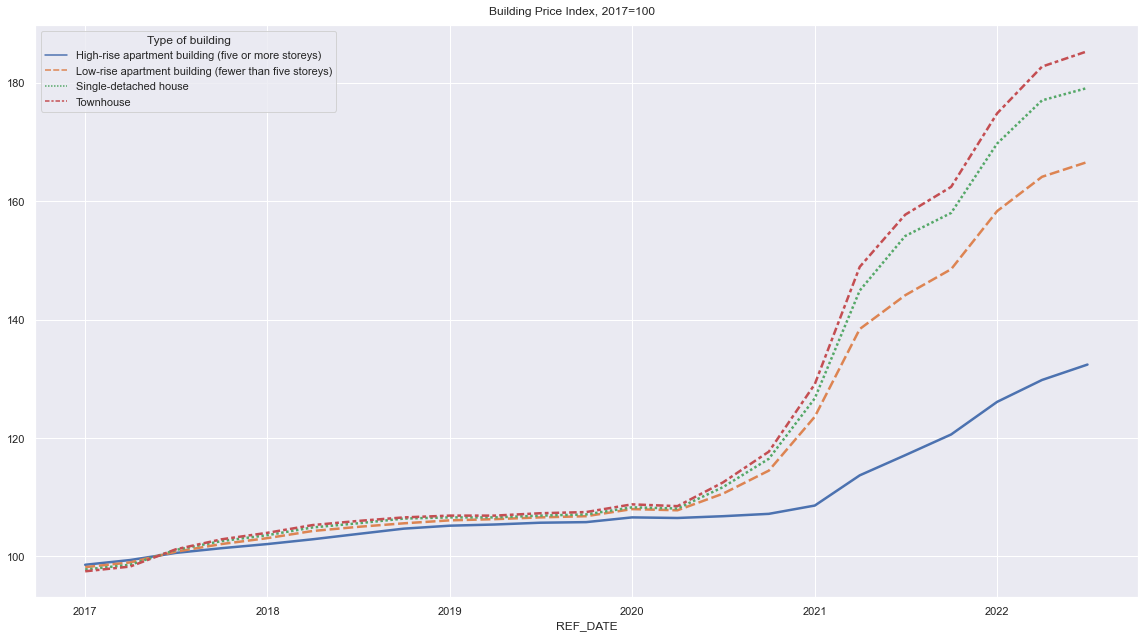

In [14]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=building_cost_cal[['High-rise apartment building (five or more storeys)',
       'Low-rise apartment building (fewer than five storeys)',
       'Single-detached house', 'Townhouse']]['2017':],linewidth=2.5,ax=ax)
fig.suptitle('Building Price Index, 2017=100')
fig.tight_layout()
plt.savefig('kbase_graphs/building_price_types.png')

When broken out by building type, townhomes and single detached homes increased the fastest, while low-rise costs grew slower, and high-rise apartments grew the slowest, potentially from economies of scale. 

In [15]:
building_cost_cal[['High-rise apartment building (five or more storeys)',
       'Low-rise apartment building (fewer than five storeys)',
       'Single-detached house', 'Townhouse']]['2016':].pct_change(4)['2017':]

Type of building,High-rise apartment building (five or more storeys),Low-rise apartment building (fewer than five storeys),Single-detached house,Townhouse
REF_DATE,,,,
2017-01-01,0.041183,NaN,NaN,NaN
2017-04-01,0.067669,NaN,NaN,NaN
2017-07-01,0.081720,NaN,NaN,NaN
2017-10-01,0.081023,NaN,NaN,NaN
2018-01-01,0.035497,0.049898,0.059305,0.066667
2018-04-01,0.035211,0.053535,0.063895,0.071211
2018-07-01,0.031809,0.041667,0.044510,0.047431
2018-10-01,0.032544,0.034280,0.037037,0.035957
2019-01-01,0.030362,0.029098,0.028958,0.027885


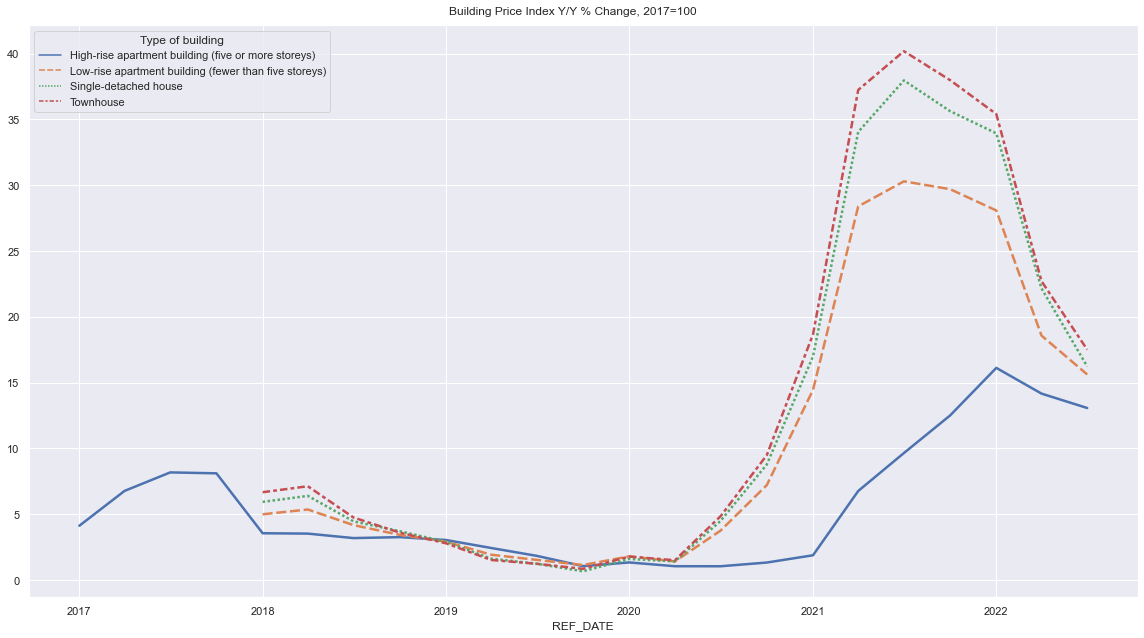

In [16]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=building_cost_cal[['High-rise apartment building (five or more storeys)',
       'Low-rise apartment building (fewer than five storeys)',
       'Single-detached house', 'Townhouse']]['2016':].pct_change(4)['2017':]*100,linewidth=2.5,ax=ax)

fig.suptitle('Building Price Index Y/Y % Change, 2017=100')
fig.tight_layout()
plt.savefig('kbase_graphs/building_price_pct.png')

A year over year look at these cost changes show that this growth peaked in mid 2021 for most building types, but is still in the 30% area. High rise year/year costs continue to increase as of the last data point.

# Mortgage Rates

In [17]:
mortgage_rate = sc.table_to_df('34-10-0145-01')[['REF_DATE','VALUE']]
mortgage_rate.columns = ['Date','5 Year Conventional Mortgage Rate']
mortgage_rate=mortgage_rate.set_index('Date')

34100145-eng.zip: 100%|██████████| 6.27k/6.27k [00:00<00:00, 2.09MB/s]


In [19]:
mortgage_rate

,5 Year Conventional Mortgage Rate
Date,
1951-01-01,5.00
1951-02-01,5.00
1951-03-01,5.00
1951-04-01,5.25
1951-05-01,5.50
...,...
2022-07-01,5.51
2022-08-01,5.58
2022-09-01,5.64


In [58]:
boc = sc.table_to_df('10-10-0139-01')

In [59]:
boc_polrate=boc[boc['Financial market statistics']=='Target rate']
boc_polrate=boc_polrate[['REF_DATE','VALUE']]
boc_polrate.columns = ['Date','BOC Target Rate']
boc_polrate=boc_polrate.set_index('Date')



In [60]:
boc_polrate = boc_polrate.resample('MS').median()

In [61]:
boc_polrate

,BOC Target Rate
Date,
1960-07-01,NaN
1960-08-01,NaN
1960-09-01,NaN
1960-10-01,NaN
1960-11-01,NaN
...,...
2022-09-01,3.25
2022-10-01,3.25
2022-11-01,3.75


In [63]:
boc_polrate=boc_polrate.shift(-1)

In [65]:
interest_rates = pd.merge(boc_polrate,mortgage_rate,left_on='Date',right_on='Date',left_index=True)

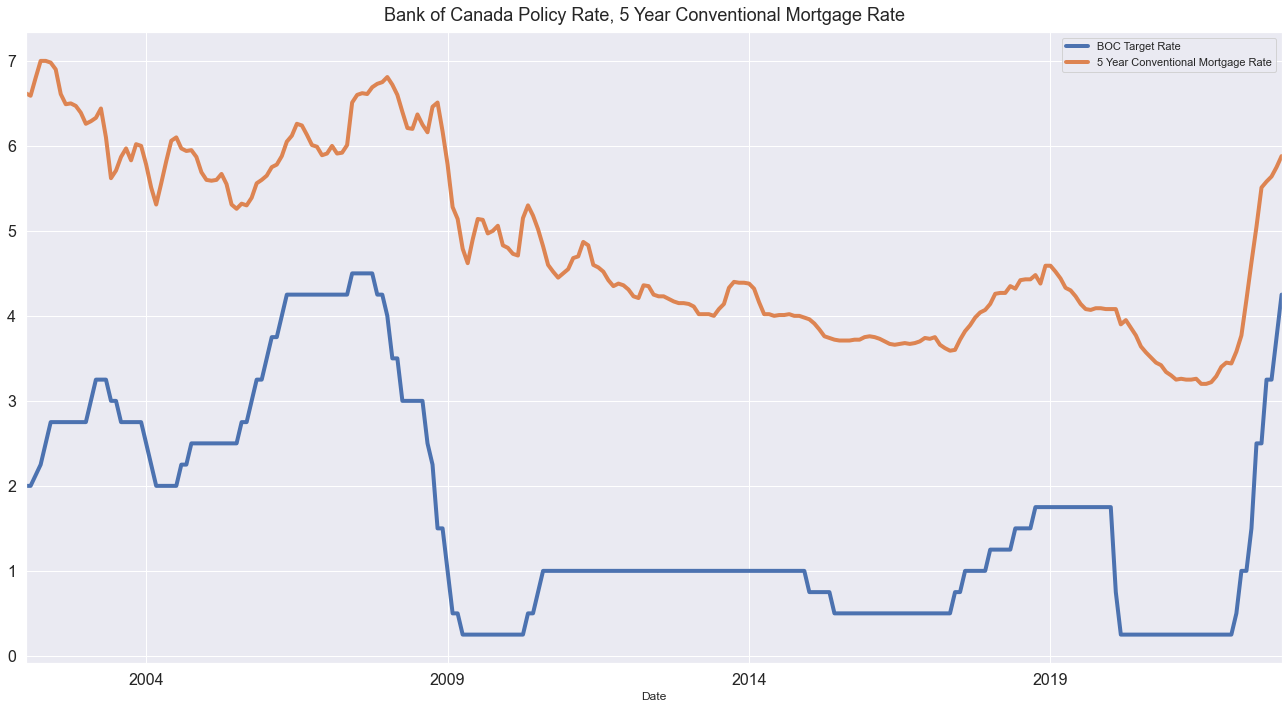

In [70]:
fig, ax = plt.subplots(figsize=(18,10))
fig.suptitle('Bank of Canada Policy Rate, 5 Year Conventional Mortgage Rate', fontsize=18)

interest_rates['2002':].plot(legend='false',fontsize=16,ax=ax,linewidth=4)
plt.tight_layout()
plt.savefig('kbase_graphs/bild_policy_rate.png')